# Preparación Dataset

## Importaciones

In [1]:
import os
import pandas as pd
from difflib import get_close_matches
import pprint
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score, roc_auc_score, log_loss,
    classification_report
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE



from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.metrics import *
import optuna
from optuna.samplers import TPESampler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

import lime
import lime.lime_tabular
import shap







### Renombrar torneos

Inserta el directorio en el cual se encuentran todos los datasets y los renombra como "nombre_torneo_año"

In [83]:
# Ruta del directorio donde están los archivos
#ruta donde se encuentran los csvs: 
directorio = './Toronto_M1000'
#Nombre con el que se renombraran los csv formato nombre_torneo_año
nombre_torneo = 'Toronto' 

In [84]:
# Listar los archivos en el directorio
archivos = os.listdir(directorio)

# Renombrar los archivos
for i, archivo in enumerate(archivos):
    # Verificar que el archivo sea un archivo CSV
    if archivo.endswith('.csv'):
        print(f"Procesando archivo: {archivo}") 
        try:
            # Leer el archivo CSV con pandas
            df = pd.read_csv(os.path.join(directorio, archivo))
            
            # Verificar que la columna 'Date' exista en el archivo
            if 'Date' in df.columns:
                print(f"Columna 'Date' encontrada en {archivo}")  
                
                # Convertir la columna 'Date' a tipo datetime
                # Este paso maneja tanto fechas con 2 como 4 dígitos en el año (DD/MM/YY y DD/MM/YYYY)
                df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
                
                # Verificar si la conversión fue exitosa
                if df['Date'].isnull().any():
                    print(f"Advertencia: Algunas fechas no se pudieron convertir en {archivo}")  
                
                # Extraer el año del primer valor en la columna 'Date' (si es posible)
                anio = int(df['Date'].dt.year.iloc[0])  # Convertimos el año a entero
                
                print(f"Año extraído para {archivo}: {anio}")  

                # Obtenemos la extensión del archivo
                nombre, extension = os.path.splitext(archivo)
                
                # Generamos el nuevo nombre con el año extraído
                nuevo_nombre = f"{nombre_torneo}_{anio}{extension}"
                
                # Verificar si el nuevo nombre es distinto al original
                if nuevo_nombre != archivo:
                    # Renombramos el archivo
                    os.rename(os.path.join(directorio, archivo), os.path.join(directorio, nuevo_nombre))
                    print(f"Renombrado {archivo} a {nuevo_nombre}")  
                else:
                    print(f"El archivo {archivo} ya tiene el nombre correcto.") 
            else:
                print(f"No se encontró la columna 'Date' en {archivo}")  
        except Exception as e:
            print(f"Error al procesar el archivo {archivo}: {e}")  

print("Archivos procesados correctamente.")

Procesando archivo: toronto (1).csv
Columna 'Date' encontrada en toronto (1).csv
Año extraído para toronto (1).csv: 2002
Renombrado toronto (1).csv a Toronto_2002.csv
Procesando archivo: toronto (10).csv
Columna 'Date' encontrada en toronto (10).csv
Advertencia: Algunas fechas no se pudieron convertir en toronto (10).csv
Año extraído para toronto (10).csv: 2021
Renombrado toronto (10).csv a Toronto_2021.csv
Procesando archivo: toronto (11).csv
Columna 'Date' encontrada en toronto (11).csv
Advertencia: Algunas fechas no se pudieron convertir en toronto (11).csv
Año extraído para toronto (11).csv: 2023
Renombrado toronto (11).csv a Toronto_2023.csv
Procesando archivo: toronto (2).csv
Columna 'Date' encontrada en toronto (2).csv
Año extraído para toronto (2).csv: 2004
Renombrado toronto (2).csv a Toronto_2004.csv
Procesando archivo: toronto (3).csv
Columna 'Date' encontrada en toronto (3).csv
Año extraído para toronto (3).csv: 2006
Renombrado toronto (3).csv a Toronto_2006.csv
Procesando 

C:\Users\marco\AppData\Local\Temp\ipykernel_2024\2299698749.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\marco\AppData\Local\Temp\ipykernel_2024\2299698749.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\marco\AppData\Local\Temp\ipykernel_2024\2299698749.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\marco\AppData\Local\Temp\ipykernel_2024\2299698749.py:19: Use

### Unir todos los datasets en uno

Genera el dataset completo con la unión de todos los toreneos de todos los años con el nombre "nombre_torneo_completo"

In [85]:
ruta_salida = './Toronto_M1000'

In [86]:

# Obtener la lista de archivos CSV en el directorio
archivos = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Crear una lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Leer cada archivo CSV y agregarlo a la lista
for archivo in archivos:
    df = pd.read_csv(os.path.join(directorio, archivo))
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df_completo = pd.concat(dfs, ignore_index=True)

# Crear el nombre del archivo de salida
nombre_archivo_salida = f"{nombre_torneo}_completo.csv"

# Guardar el DataFrame combinado en el nuevo archivo CSV
df_completo.to_csv(os.path.join(ruta_salida, nombre_archivo_salida), index=False, sep=';', decimal=',')

print(f"Todos los archivos CSV han sido combinados exitosamente en '{nombre_archivo_salida}'.")


Todos los archivos CSV han sido combinados exitosamente en 'Toronto_completo.csv'.


### Normalizar fechas formato YYYY/MM/DD

In [87]:
# Ruta del archivo CSV combinado
ruta_fichero = './Toronto_M1000'
nombre_archivo_entrada = 'Toronto_completo.csv'
# Ruta del archivo CSV de salida
nombre_archivo_salida= 'Toronto_completo_normalizado.csv'
ruta_salida = './Masters1000'

In [88]:
# Leer el archivo CSV en un DataFrame
df_completo = pd.read_csv(os.path.join(ruta_fichero, nombre_archivo_entrada),sep=';' )

# Función para convertir fechas con múltiples formatos
def convertir_fecha(fecha):
    formatos = ['%d/%m/%Y', '%d/%m/%y', '%Y-%m-%d']  # Formatos posibles
    for formato in formatos:
        try:
            return pd.to_datetime(fecha, format=formato)
        except ValueError:
            continue
    return pd.NaT  # Si no se puede convertir, devuelve NaT

# Aplicamos la función a toda la columna 'Date'
df_completo['Date'] = df_completo['Date'].astype(str).apply(convertir_fecha)

# Eliminamos filas donde la fecha sigue siendo NaT
df_completo = df_completo.dropna(subset=['Date'])

# Convertimos todas las fechas al formato `DD/MM/YYYY` 
df_completo['Date'] = df_completo['Date'].dt.strftime('%d/%m/%Y')

# Guardamos el archivo corregido
df_completo.to_csv(os.path.join(ruta_salida, nombre_archivo_salida), index=False, sep=';', decimal=',')

print(f"Archivo CSV con fechas normalizadas guardado en: {os.path.join(ruta_salida, nombre_archivo_salida)}")

Archivo CSV con fechas normalizadas guardado en: ./Masters1000\Toronto_completo_normalizado.csv


### Unir todos los Torneos

Hay que tener en cuenta que los archivos por defecto tiene ',' pero una vez que lo hemos transformado los hemos guardado con ';' por lo que debemos leerlo de esta forma si no nos dara error y no leera correctamete las columnas

In [2]:
# Ruta de entrada: carpeta donde están los CSV
directorio = './Modelo_Completo'  
# Ruta de salida: carpeta donde se guardará el CSV final
ruta_salida = './Modelo_Completo'  

In [11]:

# Obtener todos los archivos .csv del directorio
archivos = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Lista para almacenar los DataFrames
dfs = []

# Leer y combinar todos los archivos
for archivo in archivos:
    ruta_completa = os.path.join(directorio, archivo)
    print(f"Leyendo: {archivo}")
    df = pd.read_csv(ruta_completa, sep=';')  # Usa ; como separador
    dfs.append(df)

# Unir todos los DataFrames
df_completo = pd.concat(dfs, ignore_index=True)

# Nombre del archivo combinado
nombre_archivo_salida = "Masters1000_completos_normalizados.csv"
ruta_final = os.path.join(ruta_salida, nombre_archivo_salida)

# Guardar el DataFrame combinado
df_completo.to_csv(ruta_final, index=False, sep=';', decimal=',')

print(f" Archivos combinados exitosamente en: {ruta_final}")


NameError: name 'directorio' is not defined

### Nombres inconsistentes

Al unir varios datasets el nombre de los jugadores puede que no coincidan y sean parecidos pero no iguales con este paso resolveremos esos casos

In [9]:
# Obtener lista de nombres únicos de ganadores y perdedores
nombres_winners = df_completo['Winner'].dropna().unique()
nombres_losers = df_completo['Loser'].dropna().unique()

# Unificar todas las listas de nombres y convertirlos a minúsculas para mejor comparación
todos_nombres = {nombre.strip().lower() for nombre in nombres_winners}.union(
                {nombre.strip().lower() for nombre in nombres_losers})

# Diccionario para almacenar posibles inconsistencias
posibles_errores = {}

for nombre in todos_nombres:
    similares = get_close_matches(nombre, todos_nombres, n=5, cutoff=0.85)  # Ajustar el nivel de similitud
    similares = [s for s in similares if s != nombre]  # Eliminar coincidencias consigo mismo
    if similares:
        posibles_errores[nombre] = similares

# Mostrar posibles errores con mejor formato
if posibles_errores:
    print("\nPosibles nombres inconsistentes encontrados:\n")
    pprint.pprint(posibles_errores, width=100)
else:
    print("\nNo se encontraron inconsistencias en los nombres.")



Posibles nombres inconsistentes encontrados:

{'baker b.': ['baker j.'],
 'baker j.': ['blake j.', 'baker b.'],
 'beck a.': ['beck k.'],
 'beck k.': ['beck a.'],
 'bellucci m.': ['bellucci t.'],
 'bellucci t.': ['bellucci m.'],
 'benneteau a.': ['benneteau j.'],
 'benneteau j.': ['benneteau a.'],
 'black b.': ['black w.'],
 'black w.': ['black b.'],
 'blake j.': ['baker j.'],
 'blanch d.': ['blanch u.'],
 'blanch u.': ['blanchet u.', 'blanch d.'],
 'blanchet u.': ['blanch u.'],
 'bryan b.': ['bryan m.'],
 'bryan m.': ['bryan b.'],
 'coria f.': ['coria g.'],
 'coria g.': ['coria f.'],
 'daniel m.': ['daniel t.'],
 'daniel t.': ['daniel m.'],
 'delgado j.': ['delgado r.'],
 'delgado r.': ['delgado j.'],
 'dolgopolov a.': ['dolgopolov o.'],
 'dolgopolov o.': ['dolgopolov a.'],
 'draper j.': ['draper s.'],
 'draper s.': ['draper j.'],
 'elias g.': ['etlis g.'],
 'etlis g.': ['elias g.'],
 'evans b.': ['evans d.'],
 'evans d.': ['evans b.'],
 'ferreiro f.': ['ferrero j.'],
 'ferrero j.': [

### Corrección de nombres: Paso Manual

In [8]:
# PASO MANUAL: Crear diccionario de correcciones según lo que elijas
#nombre incorrecto : nombre correcto
correcciones_manual = {
    "bogomolov jr. a.": "bogomolov jr.a.",
    "carreno busta p.": "carreno-busta p.",
    "del potro j. m.": "del potro j.m.",
    "dutra da silva r.": "dutra silva r.",
    "galan d.": "galan d.e.",
    "guzman j.": "guzman j.p.",
    "herbert p.h": "herbert p.h.",
    "kim k": "kim k.",
    "lisnard j.r..": "lisnard j.r.",
    "mathieu p.": "mathieu p.h.",
    "munoz de la nava d.": "munoz-de la nava d.",
    "o connell c.": "o'connell c.",
    "tseng c. h.": "tseng c.h.",
    "varillas j. p.": "varillas j.p.",
    "lisnard j.":"lisnard j.r.",
    "zhang ze":"zhang ze.",
    "chela j.i":"chela j.",
    "chela j.i.":"chela j.",
    "ferrero j.c.":"ferrero j.",
    "kuznetsov al.":"kuznetsov a.",
    "kuznetsov an.":"kuznetsov a.",
    "youzhny a.":"youzhny m." ,
    "bogomolov jr.a.":"bogomolov a." 
    
}

# Aplicar correcciones en el DataFrame
df_completo['Winner'] = df_completo['Winner'].str.strip().str.lower().replace(correcciones_manual)
df_completo['Loser'] = df_completo['Loser'].str.strip().str.lower().replace(correcciones_manual)

print("\nNombres corregidos manualmente aplicados en el DataFrame.")


Nombres corregidos manualmente aplicados en el DataFrame.


In [10]:
# Definir la ruta base y el nombre del archivo de salida
ruta_base = r'./Modelo_Completo/nombres_corregidos'
nombre_archivo = 'GrandSlams_Masters1000_NombresCorregidos.csv'

In [11]:

# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)
# Guardar el DataFrame en un archivo CSV
df_completo.to_csv(ruta_salida,  index=False, sep=';', decimal=',')

### Cargar dataframe para añadir columnas

In [3]:
# Ruta base del archivo
ruta_base = r"./Modelo_Completo/columnas_añadidas"
# Nombre del archivo
nombre_archivo = "escaladofinal.csv"

In [4]:
ruta_completa = os.path.join(ruta_base, nombre_archivo)

# Leer el CSV correctamente
df = pd.read_csv(
    ruta_completa,
    delimiter=";",   # separador de columnas
    decimal=","      # separador decimal 
)

# Convertir fecha
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")

# Ordenar por fecha
df = df.sort_values(by="Date")

# Mostrar resumen
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26900 entries, 0 to 26899
Data columns (total 84 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ATP                           26900 non-null  float64       
 1   Location                      26900 non-null  object        
 2   Tournament                    26900 non-null  object        
 3   Date                          0 non-null      datetime64[ns]
 4   Series                        26900 non-null  object        
 5   Court                         26900 non-null  object        
 6   Surface                       26900 non-null  object        
 7   Surface_Carpet                26900 non-null  bool          
 8   Surface_Clay                  26900 non-null  bool          
 9   Surface_Grass                 26900 non-null  bool          
 10  Surface_Hard                  26900 non-null  bool          
 11  Surface_WinRate_Favorite    

## Correccion Wrank

In [14]:
for col in ["WRank", "LRank"]:
    df[col] = (
        df[col]
          .astype(str)           # asegurar que es texto
          .str.strip()           # quitar espacios
          .str.split(",").str[0] # tomar lo que va antes de la coma
          .replace({"UNR": None, "NR": None, "": None})
          .pipe(pd.to_numeric, errors="coerce")
    )


## Añadir Varibles nuevas

## Jugador favorito y no favorito

El objetivo es crear dos columnas una con el jugador favorito(jugador que ocupa mejor posición en el ranking) y otra con el jugador que no es favorito(ocupa peor posición en el ranking).

In [15]:
# Asegurar que los rankings sean numéricos
df["WRank"] = pd.to_numeric(df["WRank"], errors="coerce")
df["LRank"] = pd.to_numeric(df["LRank"], errors="coerce")

# Inicializar listas para jugadores
favorito = []
no_favorito = []

# Crear columnas según el ranking
for _, row in df.iterrows():
    w = row["Winner"]
    l = row["Loser"]
    wr = row["WRank"]
    lr = row["LRank"]

    if pd.isna(wr) and pd.isna(lr):
        favorito.append(None)
        no_favorito.append(None)
    elif pd.isna(wr):
        favorito.append(l)
        no_favorito.append(w)
    elif pd.isna(lr):
        favorito.append(w)
        no_favorito.append(l)
    elif wr < lr:
        favorito.append(w)
        no_favorito.append(l)
    else:
        favorito.append(l)
        no_favorito.append(w)

# Insertar justo después de 'Best of'
idx = df.columns.get_loc("Best of")
df.insert(idx + 1, "Player_Favorite", favorito)
df.insert(idx + 2, "Player_Not_Favorite", no_favorito)

In [16]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'jugadoresAñadidos.csv'

In [17]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## Varibale Favorite_Wins

Indica si el jugador favorito ha ganado (1) o si ha perdido (0)

In [18]:
# Inicializar lista para la variable objetivo
favorite_wins = []

# Usar las columnas ya creadas
for _, row in df.iterrows():
    if pd.isna(row["Player_Favorite"]) or pd.isna(row["Winner"]):
        favorite_wins.append(None)
    elif row["Player_Favorite"] == row["Winner"]:
        favorite_wins.append(1)
    else:
        favorite_wins.append(0)

# Insertar la variable justo después de 'Player_Not_Favorite'
idx = df.columns.get_loc("Player_Not_Favorite")
df.insert(idx + 1, "Favorite_Wins", favorite_wins)


In [19]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'favorite_wins.csv'

In [20]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## Rellenar columnas vacias WRank/LRank

In [ ]:
Para asegurarnos de que todos los jugadores tienen ranking rellenamos los jugadores que no lo tienen con un ranking muy alto

In [21]:
# Rellenar los valores nulos en 'WRank' y 'LRank' con 5000
df['WRank'] = df['WRank'].fillna(5000)
df['LRank'] = df['LRank'].fillna(5000)

# Verificar que los valores nulos han sido rellenados
print(df[['WRank', 'LRank']].isnull().sum())

WRank    0
LRank    0
dtype: int64


In [22]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'columnas_vacias.csv'

In [23]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## Rank_Favorite/Rank_Not_Favorite/Rank_Diff_Signed/Rank_Diff_Abs

Rank_favorite = Representa el ranking del jugador favorito  
Rank_Not_Favorite = Representa el ranking del jugador que no es favorito  
Rank_Diff_Signed = Representa la diferencia con signo entre el jugador favorito y el no favorito  
Rank_Diff_Abs = Representa la diferencia entre el jugador favorito y el no favorito en valor absoluto  

In [24]:
# Asegurar tipos numéricos
df["WRank"] = pd.to_numeric(df["WRank"], errors="coerce")
df["LRank"] = pd.to_numeric(df["LRank"], errors="coerce")

# Inicializar listas
rank_fav = []
rank_not_fav = []

# Calcular rankings en base al favorito
for _, row in df.iterrows():
    fav = row["Player_Favorite"]
    win = row["Winner"]
    wr = row["WRank"]
    lr = row["LRank"]

    if pd.isna(fav):
        rank_fav.append(None)
        rank_not_fav.append(None)
    elif fav == win:
        rank_fav.append(wr)
        rank_not_fav.append(lr)
    else:
        rank_fav.append(lr)
        rank_not_fav.append(wr)

# Crear columnas temporales
df["Rank_Favorite"] = rank_fav
df["Rank_Not_Favorite"] = rank_not_fav
df["Rank_Diff_Signed"] = df["Rank_Favorite"] - df["Rank_Not_Favorite"]
df["Rank_Diff_Abs"] = df["Rank_Diff_Signed"].abs()

# Reordenar: insertar después de Player_Favorite y Player_Not_Favorite
idx = df.columns.get_loc("Player_Not_Favorite")

for col in ["Rank_Favorite", "Rank_Not_Favorite", "Rank_Diff_Signed", "Rank_Diff_Abs"]:
    temp = df.pop(col)
    idx += 1
    df.insert(idx, col, temp)



In [25]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'ranking_favorito.csv'

In [26]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## WinStreak_Favorite / WinStreak_Not_Favorite

WinStreak_Favorite: Representa cuántos partidos consecutivos ha ganado el jugador favorito antes del partido actual.  
WinStreak_Not_Favorite: Representa cuántos partidos consecutivos ha ganado el jugador no favorito antes del partido actual.

Recuerda cargar el fichero mas reciente

In [27]:
# Asegurarse de que la columna 'Date' está en formato datetime y ordenada
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Diccionario para guardar racha de cada jugador
win_streaks = {}

# Nuevas listas para almacenar la racha antes del partido
streak_fav = []
streak_not_fav = []

# Recorrer el DataFrame
for _, row in df.iterrows():
    fav = row['Player_Favorite']
    no_fav = row['Player_Not_Favorite']
    winner = row['Winner']

    # Obtener las rachas antes del partido
    streak_fav_val = win_streaks.get(fav, 0)
    streak_not_fav_val = win_streaks.get(no_fav, 0)

    streak_fav.append(streak_fav_val)
    streak_not_fav.append(streak_not_fav_val)

    # Actualizar rachas después del partido
    if fav == winner:
        win_streaks[fav] = streak_fav_val + 1
        win_streaks[no_fav] = 0
    else:
        win_streaks[no_fav] = streak_not_fav_val + 1
        win_streaks[fav] = 0

# Añadir columnas al DataFrame
df['WinStreak_Favorite'] = streak_fav
df['WinStreak_Not_Favorite'] = streak_not_fav

# Insertar justo después de Player_Not_Favorite
idx = df.columns.get_loc("Player_Not_Favorite")
df.insert(idx + 1, "WinStreak_Favorite", df.pop("WinStreak_Favorite"))
df.insert(idx + 2, "WinStreak_Not_Favorite", df.pop("WinStreak_Not_Favorite"))


In [28]:
# Definir la ruta base y el nombre del archivo de salida
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'winStreak.csv'

In [29]:

# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## GrandSlams_Favorite y GrandSlams_Not_Favorite

Representa el número total de GrandSlams ganados por el jugador favorito y el no favorito antes del partido.

In [30]:

# Asegurarse de que la columna 'Date' está en formato datetime y ordenar cronológicamente
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')

# Inicializar diccionario para contar Grand Slams ganados por jugador
grand_slam_titles = {}

# Listas para almacenar resultados por fila
gs_fav = []
gs_nofav = []

# Iterar por filas del DataFrame
for _, row in df.iterrows():
    fav = row['Player_Favorite']
    nofav = row['Player_Not_Favorite']
    
    # Inicializar si no existe
    if fav not in grand_slam_titles:
        grand_slam_titles[fav] = 0
    if nofav not in grand_slam_titles:
        grand_slam_titles[nofav] = 0
    
    # Guardar títulos antes del partido
    gs_fav.append(grand_slam_titles[fav])
    gs_nofav.append(grand_slam_titles[nofav])
    
    # Si es una final de Grand Slam, añadir uno al ganador
    if row['Round'] == 'The Final' and row['Series'] == 'Grand Slam':
        if row['Favorite_Wins'] == 1:
            grand_slam_titles[fav] += 1
        else:
            grand_slam_titles[nofav] += 1

# Añadir las nuevas columnas al DataFrame
df['GrandSlams_Favorite'] = gs_fav
df['GrandSlams_Not_Favorite'] = gs_nofav

# Reordenar columnas para que queden justo después de Favorite_Wins
cols = list(df.columns)
favwins_index = cols.index('Favorite_Wins')

# Insertar las nuevas columnas en la posición deseada
cols.remove('GrandSlams_Favorite')
cols.remove('GrandSlams_Not_Favorite')
cols.insert(favwins_index + 1, 'GrandSlams_Favorite')
cols.insert(favwins_index + 2, 'GrandSlams_Not_Favorite')

# Reordenar el DataFrame
df = df[cols]

# Verificar ejemplo
print(df[['Player_Favorite', 'Player_Not_Favorite', 'Favorite_Wins', 'GrandSlams_Favorite', 'GrandSlams_Not_Favorite']].head())



   Player_Favorite Player_Not_Favorite  Favorite_Wins  GrandSlams_Favorite  \
0       kuerten g.           portas a.              0                    0   
65       martin t.          vicente f.              0                    0   
93     grosjean s.             hill m.              1                    0   
92     zabaleta m.       woodbridge t.              1                    0   
91       rochus c.          ullyett k.              1                    0   

    GrandSlams_Not_Favorite  
0                         0  
65                        0  
93                        0  
92                        0  
91                        0  


In [31]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'GrandSlams.csv'

In [32]:

# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## Master1000_Favorite y Master1000_Not_Favorite

In [ ]:
Representa el número total de master1000 ganados por el jugador favorito y el no favorito antes del partido.

In [33]:
# 2. Normalizar fecha y ordenar
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.sort_values("Date")

# 3. Diccionario donde iremos acumulando títulos Masters 1000 por jugador
masters_titles = {}

# 4. Listas para ir guardando el nº de títulos que cada jugador llevaba **antes** de cada partido
m1000_fav  = []
m1000_nfav = []

for _, row in df.iterrows():
    fav   = row["Player_Favorite"]
    nfav  = row["Player_Not_Favorite"]
    
    # Inicializar si no existen todavía
    if fav not in masters_titles:
        masters_titles[fav] = 0
    if nfav not in masters_titles:
        masters_titles[nfav] = 0
    
    # Guardar el recuento antes de este partido
    m1000_fav.append(masters_titles[fav])
    m1000_nfav.append(masters_titles[nfav])
    
    # ¿Es la final de un Masters 1000?
    if row["Round"] == "The Final" and row["Series"] in ["Masters", "Masters 1000"]:
        if row["Favorite_Wins"] == 1:
            masters_titles[fav] += 1       # ganó el favorito
        else:
            masters_titles[nfav] += 1      # ganó el no-favorito

# 5. Colocar las nuevas columnas en el DataFrame
df["Masters1000_Favorite"]     = m1000_fav
df["Masters1000_Not_Favorite"] = m1000_nfav

# 6. (Opcional) reordenar las columnas para que queden justo después de Favorite_Wins
cols            = list(df.columns)
favwins_idx     = cols.index("Favorite_Wins")
cols.remove("Masters1000_Favorite")
cols.remove("Masters1000_Not_Favorite")
cols.insert(favwins_idx + 1, "Masters1000_Favorite")
cols.insert(favwins_idx + 2, "Masters1000_Not_Favorite")
df = df[cols]

# 7. Comprobación rápida
print(
    df[
        [
            "Player_Favorite",
            "Player_Not_Favorite",
            "Favorite_Wins",
            "Masters1000_Favorite",
            "Masters1000_Not_Favorite",
        ]
    ].head()
)

   Player_Favorite Player_Not_Favorite  Favorite_Wins  Masters1000_Favorite  \
0       kuerten g.           portas a.              0                     0   
29     ferreira w.            bastl g.              1                     0   
30     bjorkman j.      stoltenberg j.              1                     0   
63    squillari f.         sirianni j.              1                     0   
2       pioline c.       ivanisevic g.              0                     0   

    Masters1000_Not_Favorite  
0                          0  
29                         0  
30                         0  
63                         0  
2                          0  


In [34]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'Master1000titles.csv'

In [35]:

# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## Surface_WinRate_Favorite / Surface_WinRate_Not_Favorite / Surface_Matches_Favorite / Surface_Matches_Not_Favorite /Favorite Wins

Representa el ratio de victorias de cada jugador en una superficie, es decir de los partidos que un jugador a jugado en una superficie, cuantos de ellos ha ganado  
Suface_Matches_Favorite/Not_Favorite: Representa el número de partidos que ha jugado cada jugador en esa superficie.
FavoriteWins indica si el jugador favorito ha ganado o no.

In [36]:
# Diccionario para almacenar historial por superficie
surface_history = {}

# Listas para las columnas
surface_winrate_fav = []
surface_winrate_nofav = []
surface_matches_fav = []
surface_matches_nofav = []

# Iterar por el DataFrame
for _, row in df.iterrows():
    fav = row['Player_Favorite']
    nofav = row['Player_Not_Favorite']
    surface = row['Surface']
    
    for player in [fav, nofav]:
        if player not in surface_history:
            surface_history[player] = {}
        if surface not in surface_history[player]:
            surface_history[player][surface] = {'wins': 0, 'total': 0}
    
    fav_stats = surface_history[fav][surface]
    nofav_stats = surface_history[nofav][surface]

    # Winrate (si nunca jugó, poner 0.0)
    wr_fav = fav_stats['wins'] / fav_stats['total'] if fav_stats['total'] > 0 else 0.0
    wr_nofav = nofav_stats['wins'] / nofav_stats['total'] if nofav_stats['total'] > 0 else 0.0

    surface_winrate_fav.append(wr_fav)
    surface_winrate_nofav.append(wr_nofav)
    surface_matches_fav.append(fav_stats['total'])
    surface_matches_nofav.append(nofav_stats['total'])

    # Actualizar historial
    if row['Favorite_Wins'] == 1:
        surface_history[fav][surface]['wins'] += 1
    else:
        surface_history[nofav][surface]['wins'] += 1

    surface_history[fav][surface]['total'] += 1
    surface_history[nofav][surface]['total'] += 1

# Añadir columnas nuevas
df['Surface_WinRate_Favorite'] = surface_winrate_fav
df['Surface_WinRate_Not_Favorite'] = surface_winrate_nofav
df['Surface_Matches_Favorite'] = surface_matches_fav
df['Surface_Matches_Not_Favorite'] = surface_matches_nofav

# Insertar después de 'Surface'
cols = list(df.columns)
surface_idx = cols.index('Surface')
for col in ['Surface_WinRate_Favorite', 'Surface_WinRate_Not_Favorite', 'Surface_Matches_Favorite', 'Surface_Matches_Not_Favorite']:
    cols.remove(col)
cols[surface_idx + 1:surface_idx + 1] = ['Surface_WinRate_Favorite', 'Surface_WinRate_Not_Favorite', 'Surface_Matches_Favorite', 'Surface_Matches_Not_Favorite']
df = df[cols]

# Verificamos las nuevas columnas
print(df[['Player_Favorite', 'Player_Not_Favorite', 'Surface',
          'Surface_WinRate_Favorite', 'Surface_WinRate_Not_Favorite',
          'Surface_Matches_Favorite', 'Surface_Matches_Not_Favorite']].head())


   Player_Favorite Player_Not_Favorite Surface  Surface_WinRate_Favorite  \
0       kuerten g.           portas a.    Hard                       0.0   
29     ferreira w.            bastl g.    Hard                       0.0   
30     bjorkman j.      stoltenberg j.    Hard                       0.0   
63    squillari f.         sirianni j.    Hard                       0.0   
2       pioline c.       ivanisevic g.    Hard                       0.0   

    Surface_WinRate_Not_Favorite  Surface_Matches_Favorite  \
0                            0.0                         0   
29                           0.0                         0   
30                           0.0                         0   
63                           0.0                         0   
2                            0.0                         0   

    Surface_Matches_Not_Favorite  
0                              0  
29                             0  
30                             0  
63                            

In [37]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'WinRateSurface.csv'

In [38]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## Round Code

In [ ]:
Codifica las rondas en formato numérico

In [39]:
# Mapeo de rondas de Grand Slam a valores numéricos
round_mapping = {
    '1st Round': 1,
    '2nd Round': 2,
    '3rd Round': 3,
    '4th Round': 4,
    'Quarterfinals': 5,
    'Semifinals': 6,
    'The Final': 7
}

# Crear nueva columna 'Round_Code'
df['Round_Code'] = df['Round'].map(round_mapping)

# Reordenar: insertar justo después de la columna 'Round'
cols = list(df.columns)
round_index = cols.index('Round')
cols.remove('Round_Code')
cols.insert(round_index + 1, 'Round_Code')
df = df[cols]


In [40]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'RoundCode.csv'

In [41]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## Win_Streak_Diff

Diferencia de racha de victorias entre un jugador y otro

In [42]:
# Asegurarse de que las columnas son numéricas
df["WinStreak_Favorite"] = pd.to_numeric(df["WinStreak_Favorite"], errors="coerce")
df["WinStreak_Not_Favorite"] = pd.to_numeric(df["WinStreak_Not_Favorite"], errors="coerce")

# Crear la columna como diferencia de rachas
df["Win_Streak_Diff"] = df["WinStreak_Favorite"] - df["WinStreak_Not_Favorite"]

# Reordenar para insertar justo después de WinStreak_Not_Favorite
cols = list(df.columns)
idx = cols.index("WinStreak_Not_Favorite")
cols.remove("Win_Streak_Diff")
cols.insert(idx + 1, "Win_Streak_Diff")
df = df[cols]

# Verifica las columnas relevantes
print(df[["Player_Favorite", "WinStreak_Favorite", "Player_Not_Favorite", "WinStreak_Not_Favorite", "Win_Streak_Diff"]].head())


   Player_Favorite  WinStreak_Favorite Player_Not_Favorite  \
0       kuerten g.                   0           portas a.   
29     ferreira w.                   0            bastl g.   
30     bjorkman j.                   0      stoltenberg j.   
63    squillari f.                   0         sirianni j.   
2       pioline c.                   0       ivanisevic g.   

    WinStreak_Not_Favorite  Win_Streak_Diff  
0                        0                0  
29                       0                0  
30                       0                0  
63                       0                0  
2                        0                0  


In [43]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'diff_win_Streak.csv'

In [44]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## ATP_Points_Favorite / ATP_Points_Not_Favorite

Representan los puntos ATP del jugador favorito y del no favorito

In [45]:

# Asegurarse de que los nombres de columna estén bien 
# Convertir WPts y LPts a numéricos por seguridad
df["WPts"] = pd.to_numeric(df["WPts"], errors="coerce")
df["LPts"] = pd.to_numeric(df["LPts"], errors="coerce")

# Crear las columnas según quién es el favorito
fav_pts = []
nofav_pts = []

for _, row in df.iterrows():
    if row["Player_Favorite"] == row["Winner"]:
        fav_pts.append(row["WPts"])
        nofav_pts.append(row["LPts"])
    else:
        fav_pts.append(row["LPts"])
        nofav_pts.append(row["WPts"])

# Agregar al DataFrame
df["ATP_Points_Favorite"] = fav_pts
df["ATP_Points_Not_Favorite"] = nofav_pts

# Reordenar para colocarlas justo después de 'Comment'
cols = list(df.columns)
idx = cols.index("Comment")
cols.remove("ATP_Points_Favorite")
cols.remove("ATP_Points_Not_Favorite")
cols.insert(idx + 1, "ATP_Points_Favorite")
cols.insert(idx + 2, "ATP_Points_Not_Favorite")
df = df[cols]

# Verificar resultado
print(df[["Player_Favorite", "Player_Not_Favorite", "ATP_Points_Favorite", "ATP_Points_Not_Favorite"]].head())



   Player_Favorite Player_Not_Favorite  ATP_Points_Favorite  \
0       kuerten g.           portas a.                  NaN   
29     ferreira w.            bastl g.                  NaN   
30     bjorkman j.      stoltenberg j.                  NaN   
63    squillari f.         sirianni j.                  NaN   
2       pioline c.       ivanisevic g.                  NaN   

    ATP_Points_Not_Favorite  
0                       NaN  
29                      NaN  
30                      NaN  
63                      NaN  
2                       NaN  


In [46]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'Points_favorite.csv'

In [47]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## Juegos Totales

In [234]:
import pandas as pd

# Asegurarse de que estas columnas existen y están en el DataFrame
cols_ganador = ["W1", "W2", "W3", "W4", "W5"]
cols_perdedor = ["L1", "L2", "L3", "L4", "L5"]

# Convertir a numérico, por si hay strings o NaNs
for col in cols_ganador + cols_perdedor:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Crear la nueva columna sumando todos los juegos jugados
df["Total_Games"] = df[cols_ganador + cols_perdedor].sum(axis=1)

# Reubicar la nueva columna justo después de 'Lsets'
cols = list(df.columns)
idx = cols.index("Lsets") + 1
cols.remove("Total_Games")
cols.insert(idx, "Total_Games")
df = df[cols]


In [48]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'JuegosTotales.csv'

In [49]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## Codificacion variables categoricas Surface y Comment

In [50]:
# --- Codificación de Surface ---
# Crear variables dummy para 'Surface' sin eliminar la columna original
df_surface_dummies = pd.get_dummies(df["Surface"], prefix="Surface")

# Obtener índice de la columna original 'Surface'
surface_index = df.columns.get_loc("Surface")

# Insertar columnas dummy justo después de 'Surface'
for i, col in enumerate(df_surface_dummies.columns):
    df.insert(surface_index + 1 + i, col, df_surface_dummies[col])

# --- Codificación de Comment ---
# Crear columna binaria 'Completed' según si el partido fue 'Completed'
df["Completed"] = (df["Comment"].str.lower() == "completed").astype(int)

# Reubicar 'Completed' justo después de 'Comment'
comment_index = df.columns.get_loc("Comment")
col_completed = df.pop("Completed")  # eliminar temporalmente
df.insert(comment_index + 1, "Completed", col_completed)  # volver a insertar en la posición correcta


In [51]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'surface_comment.csv'

In [52]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## Pierde el favorito

In [240]:
# Asegúrate de que la columna 'Favorite_Wins' existe
if "Favorite_Wins" in df.columns:
    # Si la columna ya existe, elimínala para evitar errores al insertar
    if "Favorite_Loses" in df.columns:
        df.drop(columns="Favorite_Loses", inplace=True)
    
    # Crear nueva columna: 1 si pierde el favorito, 0 si gana
    loses_col = (1 - df["Favorite_Wins"]).astype(int)
    df.insert(
        loc=df.columns.get_loc("Favorite_Wins") + 1,
        column="Favorite_Loses",
        value=loses_col
    )
else:
    print("No se encontró la columna 'Favorite_Wins'. Verifica el nombre.")




In [53]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'datasetFinal.csv'

In [54]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

## Escalado de variables

Se usará StandardScaler para el escalado de variables

In [56]:
# Lista de columnas a escalar
features_to_scale = [
    "Surface_WinRate_Favorite", "Surface_WinRate_Not_Favorite",
    "Surface_Matches_Favorite", "Surface_Matches_Not_Favorite",
    "WinStreak_Favorite", "WinStreak_Not_Favorite", "Win_Streak_Diff",
    "Rank_Favorite", "Rank_Not_Favorite", "Rank_Diff_Signed", "Rank_Diff_Abs",
    "GrandSlams_Favorite", "GrandSlams_Not_Favorite",
    "Masters1000_Favorite","Masters1000_Not_Favorite"
]

# Asegurarse de que son numéricos
for col in features_to_scale:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Escalado con StandardScaler
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [57]:
ruta_base = r"./Modelo_Completo/columnas_añadidas" 
nombre_archivo = 'escaladofinal.csv'

In [58]:
# Construir la ruta completa
ruta_salida = os.path.join(ruta_base, nombre_archivo)

# Guardar el DataFrame en un archivo CSV
df.to_csv(ruta_salida, index=False, sep=';', decimal=',')

# Modelo Regresión Logistica

In [27]:
# Contar los valores nulos por columna para comprobar que no haya nulos
print(df[features_to_scale + ["Favorite_Wins"]].isna().sum())



Surface_WinRate_Favorite        0
Surface_WinRate_Not_Favorite    0
Surface_Matches_Favorite        0
Surface_Matches_Not_Favorite    0
WinStreak_Favorite              0
WinStreak_Not_Favorite          0
Win_Streak_Diff                 0
Rank_Favorite                   0
Rank_Not_Favorite               0
Rank_Diff_Signed                0
Rank_Diff_Abs                   0
GrandSlams_Favorite             0
GrandSlams_Not_Favorite         0
Favorite_Wins                   0
dtype: int64


In [7]:
X = df[features_to_scale]  # Asegurarse de que no haya columnas extra
y = df["Favorite_Wins"]


NameError: name 'features_to_scale' is not defined

In [ ]:
#Comprobamos que no haya nulos en x ni en y
print("¿NaNs en X?:", X.isna().any().any()) 
print("¿NaNs en y?:", y.isna().any())


In [ ]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Calcular y mostrar la métrica
score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", round(score, 3))

Que el resultado de Balanced Accuracy = 0.545 indica que el modelo está rindiendo solo ligeramente mejor que un clasificador aleatorio (que tendría una balanced accuracy de ~0.5 en un problema balanceado). Esto puede deberse a que las clases esten desbalanceadas 

verificamos cuántas veces gana el favorito (Favorite_Wins). Si hay muchas más 1s que 0s, la métrica accuracy o incluso balanced_accuracy puede estar sesgada.

In [ ]:
print(y.value_counts(normalize=True))


El favorito gana en el 71.3% de los casos (Favorite_Wins = 1)  

El no favorito gana solo el 28.6% de las veces (Favorite_Wins = 0)  

dataset está desbalanceado, y eso afecta directamente al rendimiento de modelos como regresión logística, que no manejan bien el desbalance sin ajustes. Un clasificador que siempre predice 1 tendría una accuracy del 71.3%, pero no estaría aprendiendo nada útil.

Esto hace que el modelo penalice más los errores en la clase minoritaria (0), equilibrando el aprendizaje:

Cuando usas un modelo como LogisticRegression sin el argumento class_weight='balanced', trata a todas las clases por igual, aunque tengas muchas más observaciones de una clase que de otra.

Sin embargo, cuando los datos están desbalanceados (por ejemplo, 71.3% de favoritos ganan y solo 28.6% pierden), el modelo puede aprender a "ir siempre a lo seguro" y predecir siempre que el favorito gana. Esto te da una aparente alta accuracy, pero no está aprendiendo realmente.

Sin balanced: accuracy puede ser buena, pero solo porque acierta muchos “gana el favorito”.

Con balanced: el modelo acierta más veces cuando el favorito pierde, lo cual es mucho más difícil y valioso.

In [ ]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística con ajuste por desbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluar con balanced accuracy
score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", round(score, 3))

### Prueba con validación cruzada

In [ ]:
# Usamos solo las columnas que queremos escalar
X = df[features_to_scale]
y = df["Favorite_Wins"]  

# Modelo con validación cruzada (5 folds)
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# Evaluación
score_cv = balanced_accuracy_score(y, y_pred_cv)
print("Balanced Accuracy (CV):", round(score_cv, 3))

## Evaluación del modelo 

In [ ]:
# Predicciones con validación cruzada
y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')
y_pred = (y_proba[:, 1] >= 0.5).astype(int)  # convertir probabilidades en clases

# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

## Conclusiones

###  **Métricas del Modelo**

| Métrica               | Valor | ¿Qué significa?                                                                                                            |
|-----------------------|-------|----------------------------------------------------------------------------------------------------------------------------|
| **Accuracy**          | 0.642 | El modelo acierta en el 64,2% de los casos totales. Puede estar sesgado si las clases están desbalanceadas.               |
| **Balanced Accuracy** | 0.634 | La media de los aciertos por clase. Corrige el sesgo de clases desbalanceadas. Más fiable que accuracy en este caso.      |
| **Precision**         | 0.809 | Cuando el modelo predice "gana el favorito", acierta el 80,9% de las veces.                                                |
| **Recall**            | 0.652 | De todas las veces que el favorito gana, el modelo lo detecta el 65,2%.                                                    |
| **F1-Score**          | 0.722 | Media armónica entre precisión y recall. Mide el equilibrio entre ambos.                                                   |
| **AUC-ROC**           | 0.684 | Capacidad del modelo para distinguir entre ganadores y perdedores, usando probabilidades. Entre 0.5 (azar) y 1 (perfecto). |
| **Log Loss**          | 0.643 | Penaliza errores de predicción probabilística. Cuanto más bajo, mejor.                                                     |

---

###  **Matriz de Confusión**

|                         | Predicho: 0 | Predicho: 1 | Total Real |
|-------------------------|-------------|-------------|------------|
| **Real: 0** (pierde)    | 2264        | 1407        | 3671       |
| **Real: 1** (gana)      | 3187        | 5969        | 9156       |

-  **2264 veces** el modelo acertó al predecir que el favorito **no ganaba** (derrota).
-  **5969 veces** acertó al predecir que el favorito **ganaba**.
-  **1407 veces** predijo "gana" cuando perdió.
-  **3187 veces** predijo "pierde" cuando ganó.

---

###  **Classification Report**

| Clase | Precision | Recall | F1-Score | Soporte | Interpretación |
|-------|-----------|--------|----------|---------|----------------|
| **0** (pierde el favorito) | 0.42 | 0.62 | 0.50 | 3671 | Buena capacidad para detectar derrotas. Aunque la precisión es baja, el recall es decente (detecta 6 de cada 10). |
| **1** (gana el favorito)   | 0.81 | 0.65 | 0.72 | 9156 | Alta precisión (cuando predice "gana", suele acertar), aunque se le escapan algunas victorias reales. |


 ## Random Forest + validación cruzada

In [ ]:
# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Validación cruzada
y_proba_rf = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')
y_pred_rf = (y_proba_rf[:, 1] >= 0.5).astype(int)

In [ ]:

# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_rf), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_rf), 3))
print("Precision:", round(precision_score(y, y_pred_rf), 3))
print("Recall:", round(recall_score(y, y_pred_rf), 3))
print("F1-Score:", round(f1_score(y, y_pred_rf), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_rf[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_rf[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_rf))
print("\nClassification Report:\n", classification_report(y, y_pred_rf))

###  Comparativa de Modelos: Regresión Logística vs Random Forest

| Métrica               | Regresión Logística | Random Forest | Comentario |
|-----------------------|---------------------|----------------|------------|
| **Accuracy**          | 0.642               | 0.707          | RF tiene mejor rendimiento general. |
| **Balanced Accuracy** | 0.634               | 0.554          | Logística más equilibrada entre clases. |
| **Precision**         | 0.809               | 0.739          | Logística es más precisa al predecir victorias. |
| **Recall**            | 0.652               | 0.912          | RF detecta muchas más victorias del favorito. |
| **F1-Score**          | 0.722               | 0.816          | RF logra mejor equilibrio entre precisión y recall. |
| **AUC-ROC**           | 0.684               | 0.673          | Muy similares; capacidad discriminativa comparable. |
| **Log Loss**          | 0.643               | 0.571          | RF produce mejores probabilidades calibradas. |

---

###  Classification Report del Modelo (Random Forest)

| Clase | Precision | Recall | F1-Score | Soporte | Interpretación |
|-------|-----------|--------|----------|---------|----------------|
| **0** (pierde el favorito) | 0.47 | 0.20 | 0.28 | 3671 | Predice derrotas con precisión moderada, pero **solo detecta el 20%** de las reales. Bajo recall. |
| **1** (gana el favorito)   | 0.74 | 0.91 | 0.82 | 9156 | Excelente rendimiento: **detecta el 91%** de las victorias y con buena precisión. |

---

###  Conclusiones:

-  **Random Forest** mejora el rendimiento general, sobre todo en la **detección de victorias del favorito** (recall 91,2%).
- Sin embargo, **sacrifica rendimiento en la clase minoritaria** (derrotas), con un recall del 20% y balanced accuracy inferior.
-  La **regresión logística** es más equilibrada entre clases, pero menos potente globalmente.



## Modelo Gradient Boosting

In [ ]:
# Modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Validación cruzada
y_proba_gb = cross_val_predict(gb_model, X, y, cv=5, method='predict_proba')
y_pred_gb = (y_proba_gb[:, 1] >= 0.5).astype(int)

In [ ]:
# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_gb), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_gb), 3))
print("Precision:", round(precision_score(y, y_pred_gb), 3))
print("Recall:", round(recall_score(y, y_pred_gb), 3))
print("F1-Score:", round(f1_score(y, y_pred_gb), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_gb[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_gb[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_gb))
print("\nClassification Report:\n", classification_report(y, y_pred_gb))

###  Comparativa de Modelos: Regresión Logística vs Random Forest vs Gradient Boosting

| Métrica               | Regresión Logística | Random Forest | Gradient Boosting | Comentario |
|-----------------------|---------------------|----------------|-------------------|------------|
| **Accuracy**          | 0.642               | 0.707          | 0.717             | GB y RF superan claramente a Logística. |
| **Balanced Accuracy** | 0.634               | 0.554          | 0.553             | Logística es la más equilibrada entre clases. |
| **Precision**         | 0.809               | 0.739          | 0.738             | Logística es más precisa al predecir victorias. |
| **Recall**            | 0.652               | 0.912          | 0.936             | GB detecta la mayor parte de las victorias. |
| **F1-Score**          | 0.722               | 0.816          | 0.825             | GB logra el mejor equilibrio entre precisión y recall. |
| **AUC-ROC**           | 0.684               | 0.673          | 0.699             | GB tiene la mejor capacidad discriminativa. |
| **Log Loss**          | 0.643               | 0.571          | 0.547             | GB también ofrece las mejores probabilidades calibradas. |

---

###  Classification Report del Modelo (Gradient Boosting)

| Clase | Precision | Recall | F1-Score | Soporte | Interpretación |
|-------|-----------|--------|----------|---------|----------------|
| **0** (pierde el favorito) | 0.51 | 0.17 | 0.26 | 3671 | Muy baja capacidad para detectar derrotas. Solo identifica el 17% de ellas, con precisión limitada. |
| **1** (gana el favorito)   | 0.74 | 0.94 | 0.83 | 9156 | Excelente rendimiento: detecta el 94% de las victorias con buena precisión. |

---

###  Conclusiones Generales

- **Regresión Logística**: Modelo más equilibrado entre clases, pero con menor rendimiento global.
- **Random Forest**: Muy buen desempeño para victorias del favorito, aunque limitado en la detección de derrotas.
- **Gradient Boosting**: Mejor modelo en métricas globales (F1, AUC, Log Loss), pero **sacrifica notablemente la clase minoritaria** (recall del 17% en derrotas).
- Si el objetivo es **predecir victorias del favorito con alta fiabilidad**, **Gradient Boosting es el modelo más eficaz**.



## Modelo Gradient Boosting balanceado

In [ ]:
gb_model = HistGradientBoostingClassifier(class_weight='balanced', max_iter=100, learning_rate=0.1, max_depth=6, random_state=42)

# Validación cruzada
y_proba_gb = cross_val_predict(gb_model, X, y, cv=5, method='predict_proba')
y_pred_gb = (y_proba_gb[:, 1] >= 0.5).astype(int)

In [ ]:
print("Accuracy:", round(accuracy_score(y, y_pred_gb), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_gb), 3))
print("Precision:", round(precision_score(y, y_pred_gb), 3))
print("Recall:", round(recall_score(y, y_pred_gb), 3))
print("F1-Score:", round(f1_score(y, y_pred_gb), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_gb[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_gb[:, 1]), 3))

print("Confusion Matrix:\n", confusion_matrix(y, y_pred_gb))
print("\nClassification Report:\n", classification_report(y, y_pred_gb))

### Resultados del Modelo: HistGradientBoostingClassifier con `class_weight='balanced'`

| Métrica               | Valor  | Interpretación |
|-----------------------|--------|----------------|
| **Accuracy**          | 0.633  | Acierta en el 63,3% de los casos totales. Más equilibrado pero algo menos preciso en global. |
| **Balanced Accuracy** | 0.646  | La mejor hasta ahora. Buen equilibrio entre clases, útil si interesan las derrotas del favorito. |
| **Precision**         | 0.825  | Cuando predice que gana el favorito, acierta el 82,5% de las veces. Muy alta precisión. |
| **Recall**            | 0.617  | Detecta el 61,7% de las victorias reales del favorito. |
| **F1-Score**          | 0.706  | Buen equilibrio entre precisión y recall. Muy similar a regresión logística. |
| **AUC-ROC**           | 0.695  | Alta capacidad para distinguir entre clases en base a probabilidades. |
| **Log Loss**          | 0.618  | Mejores predicciones probabilísticas que la regresión logística, peor que Gradient Boosting sin balancear. |

---

###  Matriz de Confusión

|                 | Predicho: 0 | Predicho: 1 |
|-----------------|-------------|-------------|
| **Real: 0**     | 2475        | 1196        |
| **Real: 1**     | 3506        | 5650        |

-  Acierta **2475** derrotas del favorito (mucho mejor que otros modelos).
-  Acierta **5650** victorias del favorito.
-  Falla **1196** veces diciendo que ganaría y no fue así.
-  Falla **3506** veces diciendo que perdería y en realidad ganó.

---

###  Classification Report

| Clase | Precision | Recall | F1-Score | Soporte | Interpretación |
|-------|-----------|--------|----------|---------|----------------|
| **0** (pierde el favorito) | 0.41 | 0.67 | 0.51 | 3671 | Mejora notable en detección de derrotas (67%). Aunque la precisión no es alta, acierta muchas de las derrotas reales. |
| **1** (gana el favorito)   | 0.83 | 0.62 | 0.71 | 9156 | Muy buena precisión (83%). Aunque se le escapan algunas victorias, mantiene buen balance. |

---

###  Conclusión

Este modelo logra el **mejor equilibrio entre clases** hasta el momento. Es ideal si te interesa **detectar sorpresas (derrotas del favorito)** sin sacrificar completamente el rendimiento global. Aunque pierde algo de recall en victorias, gana mucho en representar mejor ambas clases.



## MLPClassifier (GS + M1000)

In [ ]:
# Modelo MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # una capa oculta con 100 neuronas
    max_iter=300,
    alpha=1e-4,
    solver='adam',
    random_state=42
)

# Validación cruzada
y_proba_mlp = cross_val_predict(mlp_model, X, y, cv=5, method='predict_proba')
y_pred_mlp = (y_proba_mlp[:, 1] >= 0.5).astype(int)


In [ ]:
# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_mlp), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_mlp), 3))
print("Precision:", round(precision_score(y, y_pred_mlp), 3))
print("Recall:", round(recall_score(y, y_pred_mlp), 3))
print("F1-Score:", round(f1_score(y, y_pred_mlp), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_mlp[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_mlp[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y, y_pred_mlp))

### Resultados del Modelo: MLPClassifier (Perceptrón Multicapa)

| Métrica               | Valor  | Interpretación |
|-----------------------|--------|----------------|
| **Accuracy**          | 0.714  | Buen rendimiento general: acierta en el 71,4% de los casos. |
| **Balanced Accuracy** | 0.556  | Bastante baja: el modelo favorece fuertemente la clase 1 (victorias del favorito). |
| **Precision**         | 0.739  | Cuando predice que gana el favorito, acierta el 73,9% de las veces. |
| **Recall**            | 0.925  | Excelente: detecta el 92,5% de las victorias reales. |
| **F1-Score**          | 0.822  | Excelente equilibrio entre precisión y recall para la clase mayoritaria. |
| **AUC-ROC**           | 0.699  | Muy buen poder discriminativo usando probabilidades. |
| **Log Loss**          | 0.551  | Predicciones probabilísticas bastante buenas. |

---

###  Matriz de Confusión

|                 | Predicho: 0 | Predicho: 1 |
|-----------------|-------------|-------------|
| **Real: 0**     | 688         | 2983        |
| **Real: 1**     | 689         | 8467        |

-  El modelo acierta **8467 victorias del favorito** (recall altísimo).
-  Solo detecta **688 derrotas reales**, y se equivoca **2983 veces** prediciendo que ganaría cuando en realidad perdió.

---

###  Classification Report (Resumen)

| Clase | Precision | Recall | F1-Score | Soporte |
|-------|-----------|--------|----------|---------|
| **0** (pierde el favorito) | 0.50 | 0.19 | 0.27 | 3671 |
| **1** (gana el favorito)   | 0.74 | 0.92 | 0.82 | 9156 |

---

###  Conclusión

El MLP muestra muy buen rendimiento al predecir victorias del favorito**, con alta precisión y recall, pero ignora en gran parte las derrotas (clase minoritaria).


 


# MLPClassifier con SMOTE

Cuando entrenas un modelo con clases desbalanceadas, este suele ignorar la clase minoritaria (como las derrotas del favorito), porque aprende a predecir siempre la mayoritaria para maximizar el acierto global.
SMOTE lo soluciona generando datos sintéticos (falsos pero realistas) de la clase minoritaria, haciendo que el modelo:
- preste atención a esa clase,
- aprenda patrones también cuando el favorito pierde.

In [ ]:
# 1. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 3. Entrenar MLP sobre datos balanceados
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_sm, y_train_sm)

# 4. Predecir sobre el test original
y_pred_mlp = mlp_model.predict(X_test)
y_proba_mlp = mlp_model.predict_proba(X_test)


In [ ]:
# 5. Métricas
print("Accuracy:", round(accuracy_score(y_test, y_pred_mlp), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred_mlp), 3))
print("Precision:", round(precision_score(y_test, y_pred_mlp), 3))
print("Recall:", round(recall_score(y_test, y_pred_mlp), 3))
print("F1-Score:", round(f1_score(y_test, y_pred_mlp), 3))
print("AUC-ROC:", round(roc_auc_score(y_test, y_proba_mlp[:, 1]), 3))
print("Log Loss:", round(log_loss(y_test, y_proba_mlp[:, 1]), 3))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))

###  Resultados del Modelo: MLPClassifier con SMOTE

| Métrica               | Valor  | Interpretación |
|-----------------------|--------|----------------|
| **Accuracy**          | 0.625  | Acierta en el 62,5% de los casos. Disminuye ligeramente frente al MLP sin balancear, pero mejora la detección de derrotas. |
| **Balanced Accuracy** | 0.632  | Mucho mejor que el MLP sin balancear (0.556). Buen avance en el tratamiento de clases desbalanceadas. |
| **Precision**         | 0.815  | Muy alta cuando predice victorias (clase 1). |
| **Recall**            | 0.615  | Más bajo que antes en victorias, pero mejora mucho en derrotas. |
| **F1-Score**          | 0.701  | Buen equilibrio entre precisión y recall. |
| **AUC-ROC**           | 0.681  | Alta capacidad discriminativa usando probabilidades. |
| **Log Loss**          | 0.638  | Predicciones probabilísticas razonablemente fiables. |

---

###  Matriz de Confusión

|                 | Predicho: 0 | Predicho: 1 |
|-----------------|-------------|-------------|
| **Real: 0**     | 474         | 256         |
| **Real: 1**     | 707         | 1129        |

-  Detecta correctamente **474 derrotas del favorito** (recall clase 0: **65%**).
-  Detecta correctamente **1129 victorias del favorito** (recall clase 1: **61%**).
-  Se confunde más que antes, pero **recupera la clase minoritaria**, lo que muchos modelos anteriores no lograban.

---

###  Classification Report (Resumen)

| Clase | Precision | Recall | F1-Score | Soporte |
|-------|-----------|--------|----------|---------|
| **0** (pierde el favorito) | 0.40 | 0.65 | 0.50 | 730 |
| **1** (gana el favorito)   | 0.82 | 0.61 | 0.70 | 1836 |

---

###  Conclusión

El MLP entrenado con **SMOTE** logra un balance mucho mejor entre clases, especialmente en detectar derrotas del favorito.

-  Aunque su accuracy baja un poco, es uno de los mejores modelos para detectar sorpresas (cuando el favorito pierde).
-  El coste es una ligera pérdida de precisión general, pero se compensa con una visión más equilibrada del problema.



# Comparación de modelos

###  Comparativa de Modelos: Rendimiento Global

| Modelo                    | Accuracy | Balanced Acc | Precision | Recall | F1-Score | AUC-ROC | Log Loss | Comentario principal |
|---------------------------|----------|---------------|-----------|--------|----------|---------|----------|------------------------|
| **Regresión Logística**   | 0.642    | 0.634         | 0.809     | 0.652  | 0.722    | 0.684   | 0.643    | Buen equilibrio, sencillo y fiable |
| **Random Forest**         | 0.707    | 0.554         | 0.739     | 0.912  | 0.816    | 0.673   | 0.571    | Muy sesgado hacia victorias |
| **Gradient Boosting**     | 0.717    | 0.553         | 0.738     | 0.936  | 0.825    | 0.699   | 0.547    | Mejor F1, pero ignora derrotas |
| **GB con Balanceo**       | 0.633    | 0.646         | 0.825     | 0.617  | 0.706    | 0.695   | 0.618    | Mejor balance entre clases |
| **MLP (sin balancear)**   | 0.714    | 0.556         | 0.739     | 0.925  | 0.822    | 0.699   | 0.551    | Gran recall en victorias, malo en derrotas |
| **MLP + SMOTE**           | 0.625    | 0.632         | 0.815     | 0.615  | 0.701    | 0.681   | 0.638    | Buen equilibrio, mejor para detectar derrotas |


**-  Mejor modelo balanceado:** GB con balanceo o MLP + SMOTE, si  interesa detectar **derrotas del favorito**. Ambos mejoran considerablemente la **Balanced Accuracy** y el **recall de la clase minoritaria**, a costa de algo de rendimiento global.

**-Mejor en rendimiento general (F1 más alto):** Gradient Boosting sin balanceo, con un **F1-Score de 0.825** y **recall del 93,6%** para las victorias. Ideal si solo interesa acertar al máximo los casos comunes.

**- Mejor AUC-ROC (discriminación probabilística):** Gradient Boosting sin balanceo (**0.699**) y MLP sin balancear (**0.699**) empatan como los más fiables en cuanto a la calidad de las probabilidades que asignan.


# Favorite_Loses

In [ ]:
X = df[features_to_scale]  # Asegurarse de que no haya columnas extra
y = df["Favorite_Loses"]


In [ ]:
#Comprobamos que no haya nulos en x ni en y
print("¿NaNs en X?:", X.isna().any().any()) 
print("¿NaNs en y?:", y.isna().any())


In [ ]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Calcular y mostrar la métrica
score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", round(score, 3))

In [ ]:
print(y.value_counts(normalize=True))

In [ ]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística con ajuste por desbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluar con balanced accuracy
score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", round(score, 3))

## Prueba con validación cruzada

In [ ]:
# Usamos solo las columnas que queremos escalar
X = df[features_to_scale]
y = df["Favorite_Loses"]  

# Modelo con validación cruzada (5 folds)
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# Evaluación
score_cv = balanced_accuracy_score(y, y_pred_cv)
print("Balanced Accuracy (CV):", round(score_cv, 3))

## Evaluacion del modelo

In [ ]:
# Predicciones con validación cruzada
y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')
y_pred = (y_proba[:, 1] >= 0.5).astype(int)  # convertir probabilidades en clases

# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

 ## Random Forest + validación cruzada

In [ ]:
# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Validación cruzada
y_proba_rf = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')
y_pred_rf = (y_proba_rf[:, 1] >= 0.5).astype(int)


In [ ]:
# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_rf), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_rf), 3))
print("Precision:", round(precision_score(y, y_pred_rf), 3))
print("Recall:", round(recall_score(y, y_pred_rf), 3))
print("F1-Score:", round(f1_score(y, y_pred_rf), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_rf[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_rf[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_rf))
print("\nClassification Report:\n", classification_report(y, y_pred_rf))

In [ ]:
# Modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Validación cruzada
y_proba_gb = cross_val_predict(gb_model, X, y, cv=5, method='predict_proba')
y_pred_gb = (y_proba_gb[:, 1] >= 0.5).astype(int)


In [ ]:
# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_gb), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_gb), 3))
print("Precision:", round(precision_score(y, y_pred_gb), 3))
print("Recall:", round(recall_score(y, y_pred_gb), 3))
print("F1-Score:", round(f1_score(y, y_pred_gb), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_gb[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_gb[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_gb))
print("\nClassification Report:\n", classification_report(y, y_pred_gb))


## Modelo Gradient Boosting balanceado

In [ ]:
gb_model = HistGradientBoostingClassifier(class_weight='balanced', max_iter=100, learning_rate=0.1, max_depth=6, random_state=42)

# Validación cruzada
y_proba_gb = cross_val_predict(gb_model, X, y, cv=5, method='predict_proba')
y_pred_gb = (y_proba_gb[:, 1] >= 0.5).astype(int)



In [ ]:
print("Accuracy:", round(accuracy_score(y, y_pred_gb), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_gb), 3))
print("Precision:", round(precision_score(y, y_pred_gb), 3))
print("Recall:", round(recall_score(y, y_pred_gb), 3))
print("F1-Score:", round(f1_score(y, y_pred_gb), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_gb[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_gb[:, 1]), 3))

print("Confusion Matrix:\n", confusion_matrix(y, y_pred_gb))
print("\nClassification Report:\n", classification_report(y, y_pred_gb))


## MLPClassifier


In [ ]:



# Modelo MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # una capa oculta con 100 neuronas
    max_iter=300,
    alpha=1e-4,
    solver='adam',
    random_state=42
)

# Validación cruzada
y_proba_mlp = cross_val_predict(mlp_model, X, y, cv=5, method='predict_proba')
y_pred_mlp = (y_proba_mlp[:, 1] >= 0.5).astype(int)


In [ ]:
# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_mlp), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_mlp), 3))
print("Precision:", round(precision_score(y, y_pred_mlp), 3))
print("Recall:", round(recall_score(y, y_pred_mlp), 3))
print("F1-Score:", round(f1_score(y, y_pred_mlp), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_mlp[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_mlp[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y, y_pred_mlp))

In [ ]:


# MLPClassifier con SMOTE

# 1. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 3. Entrenar MLP sobre datos balanceados
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_sm, y_train_sm)

# 4. Predecir sobre el test original
y_pred_mlp = mlp_model.predict(X_test)
y_proba_mlp = mlp_model.predict_proba(X_test)


In [ ]:
# 5. Métricas
print("Accuracy:", round(accuracy_score(y_test, y_pred_mlp), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred_mlp), 3))
print("Precision:", round(precision_score(y_test, y_pred_mlp), 3))
print("Recall:", round(recall_score(y_test, y_pred_mlp), 3))
print("F1-Score:", round(f1_score(y_test, y_pred_mlp), 3))
print("AUC-ROC:", round(roc_auc_score(y_test, y_proba_mlp[:, 1]), 3))
print("Log Loss:", round(log_loss(y_test, y_proba_mlp[:, 1]), 3))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))


##  Plan de Mejora de Modelos

### Seleccionar los algoritmos más prometedores
- Criterio de selección: **mayor AUC-ROC**
- Modelos seleccionados:
  - `Gradient Boosting` (sin balanceo)
  - `MLPClassifier (sin balancear)`

---

### Optimización de hiperparámetros

####  Objetivo:
- Mejorar el rendimiento de los modelos elegidos sin modificar su estructura interna.

####  Métodos que usaré:
- `RandomizedSearchCV`: ideal para pruebas rápidas con espacio de búsqueda definido.
- `Optuna`: optimización bayesiana, más inteligente y eficiente en exploración de hiperparámetros.

#### Parámetros a optimizar:

**Gradient Boosting:**
- `learning_rate`, `max_depth`, `n_estimators`, `subsample`

**MLPClassifier:**
- `hidden_layer_sizes`, `alpha`, `learning_rate_init`, `solver`, `activation`

---


In [21]:
X = df[features_to_scale]  # Asegurarse de que no haya columnas extra
y = df["Favorite_Wins"]

# Modelo Gradient Boosting

In [29]:
# Modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Validación cruzada
y_proba_gb = cross_val_predict(gb_model, X, y, cv=5, method='predict_proba')
y_pred_gb = (y_proba_gb[:, 1] >= 0.5).astype(int)


In [30]:

# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_gb), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_gb), 3))
print("Precision:", round(precision_score(y, y_pred_gb), 3))
print("Recall:", round(recall_score(y, y_pred_gb), 3))
print("F1-Score:", round(f1_score(y, y_pred_gb), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_gb[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_gb[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_gb))
print("\nClassification Report:\n", classification_report(y, y_pred_gb))

Accuracy: 0.717
Balanced Accuracy: 0.553
Precision: 0.738
Recall: 0.936
F1-Score: 0.825
AUC-ROC: 0.699
Log Loss: 0.547
Confusion Matrix:
 [[ 623 3048]
 [ 587 8569]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.17      0.26      3671
           1       0.74      0.94      0.83      9156

    accuracy                           0.72     12827
   macro avg       0.63      0.55      0.54     12827
weighted avg       0.67      0.72      0.66     12827



# Modelo MLP

In [31]:
# Modelo MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # una capa oculta con 100 neuronas
    max_iter=300,
    alpha=1e-4,
    solver='adam',
    random_state=42
)

# Validación cruzada
y_proba_mlp = cross_val_predict(mlp_model, X, y, cv=5, method='predict_proba')
y_pred_mlp = (y_proba_mlp[:, 1] >= 0.5).astype(int)



In [32]:

# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_mlp), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_mlp), 3))
print("Precision:", round(precision_score(y, y_pred_mlp), 3))
print("Recall:", round(recall_score(y, y_pred_mlp), 3))
print("F1-Score:", round(f1_score(y, y_pred_mlp), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_mlp[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_mlp[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y, y_pred_mlp))


Accuracy: 0.714
Balanced Accuracy: 0.556
Precision: 0.739
Recall: 0.925
F1-Score: 0.822
AUC-ROC: 0.699
Log Loss: 0.551
Confusion Matrix:
 [[ 688 2983]
 [ 689 8467]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.19      0.27      3671
           1       0.74      0.92      0.82      9156

    accuracy                           0.71     12827
   macro avg       0.62      0.56      0.55     12827
weighted avg       0.67      0.71      0.66     12827



## Mejora Gradient Boosting

In [33]:
# 1. Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0]
}

# 2. Instanciar el modelo base
gb_model = GradientBoostingClassifier(random_state=42)

# 3. Búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(
    gb_model, param_dist, n_iter=20, cv=5,
    scoring='roc_auc', random_state=42, n_jobs=-1
)
random_search.fit(X, y)

# 4. Mejor modelo encontrado
best_gb = random_search.best_estimator_
print("Mejores hiperparámetros encontrados:", random_search.best_params_)

# 5. Validación cruzada con el mejor modelo
y_proba_gb = cross_val_predict(best_gb, X, y, cv=5, method='predict_proba')
y_pred_gb = (y_proba_gb[:, 1] >= 0.5).astype(int)

# 6. Evaluación
print("\nMétricas:")
print("Accuracy:", round(accuracy_score(y, y_pred_gb), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_gb), 3))
print("Precision:", round(precision_score(y, y_pred_gb), 3))
print("Recall:", round(recall_score(y, y_pred_gb), 3))
print("F1-Score:", round(f1_score(y, y_pred_gb), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_gb[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_gb[:, 1]), 3))

print("\nMatriz de Confusión:\n", confusion_matrix(y, y_pred_gb))
print("\nClassification Report:\n", classification_report(y, y_pred_gb))

Mejores hiperparámetros encontrados: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}

Métricas:
Accuracy: 0.718
Balanced Accuracy: 0.53
Precision: 0.727
Recall: 0.969
F1-Score: 0.831
AUC-ROC: 0.701
Log Loss: 0.547

Matriz de Confusión:
 [[ 339 3332]
 [ 287 8869]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.09      0.16      3671
           1       0.73      0.97      0.83      9156

    accuracy                           0.72     12827
   macro avg       0.63      0.53      0.49     12827
weighted avg       0.67      0.72      0.64     12827



In [10]:
# 1. Instanciar modelo con mejores hiperparámetros
model = GradientBoostingClassifier(
    subsample=0.6,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.01,
    random_state=42
)

# 2. Validación cruzada con probabilidad
y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba', n_jobs=-1)
y_pred = (y_proba[:, 1] >= 0.5).astype(int)

# 3. Métricas
print("MÉTRICAS DEL MODELO OPTIMIZADO (Gradient Boosting):")
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba[:, 1]), 3))

# 4. Matriz de Confusión
print("\nMatriz de Confusión:\n", confusion_matrix(y, y_pred))

# 5. Reporte de Clasificación
print("\nClassification Report:\n", classification_report(y, y_pred))


MÉTRICAS DEL MODELO OPTIMIZADO (Gradient Boosting):
Accuracy: 0.718
Balanced Accuracy: 0.53
Precision: 0.727
Recall: 0.969
F1-Score: 0.831
AUC-ROC: 0.701
Log Loss: 0.547

Matriz de Confusión:
 [[ 339 3332]
 [ 287 8869]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.09      0.16      3671
           1       0.73      0.97      0.83      9156

    accuracy                           0.72     12827
   macro avg       0.63      0.53      0.49     12827
weighted avg       0.67      0.72      0.64     12827



In [ ]:
# 1. Inicializar predicciones vacías
y_proba = np.zeros((len(y), 2))
y_pred = np.zeros(len(y))

# 2. Validación cruzada manual con sample_weight
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in kf.split(X, y):
    # Usamos .iloc para indexar por posición en Pandas
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Calcular pesos balanceados solo para entrenamiento
    weights = compute_sample_weight(class_weight='balanced', y=y_train)

    # Modelo Gradient Boosting optimizado
    model = GradientBoostingClassifier(
        subsample=0.6,
        n_estimators=200,
        max_depth=5,
        learning_rate=0.01,
        random_state=42
    )

    # Entrenar con pesos
    model.fit(X_train, y_train, sample_weight=weights)

    # Guardar predicciones
    y_proba[test_idx] = model.predict_proba(X_test)
    y_pred[test_idx] = model.predict(X_test)

# 3. Evaluación
print("MÉTRICAS CON sample_weight='balanced':")
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba[:, 1]), 3))

print("\nMatriz de Confusión:\n", confusion_matrix(y, y_pred.astype(int)))
print("\nClassification Report:\n", classification_report(y, y_pred.astype(int)))


## Optuna 

In [11]:
# Objetivo de optimización
def objective(trial):
    # Hiperparámetros a optimizar
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    }

    # Validación cruzada
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []

    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        weights = compute_sample_weight(class_weight='balanced', y=y_train)

        model = GradientBoostingClassifier(
            **params,
            random_state=42
        )

        model.fit(X_train, y_train, sample_weight=weights)
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        aucs.append(auc)

    return np.mean(aucs)

# Crear y ejecutar estudio
study = optuna.create_study(direction='maximize', study_name='GB_AUC_Optimization')
study.optimize(objective, n_trials=100, n_jobs=1)  # subir n_trials a 50-100 si quieres mejor resultado

# Mostrar mejor resultado
print(" Mejor AUC-ROC:", round(study.best_value, 4))
print(" Mejores hiperparámetros encontrados:")
print(study.best_params)

[I 2025-06-18 13:05:16,445] A new study created in memory with name: GB_AUC_Optimization
[I 2025-06-18 13:05:35,593] Trial 0 finished with value: 0.7008205915572973 and parameters: {'learning_rate': 0.008687120049245302, 'n_estimators': 117, 'max_depth': 7, 'subsample': 0.9818765526179951}. Best is trial 0 with value: 0.7008205915572973.
[I 2025-06-18 13:06:10,344] Trial 1 finished with value: 0.7018176296201954 and parameters: {'learning_rate': 0.005484872956575414, 'n_estimators': 169, 'max_depth': 9, 'subsample': 0.6332796468640152}. Best is trial 1 with value: 0.7018176296201954.
[I 2025-06-18 13:06:58,121] Trial 2 finished with value: 0.7024957406428853 and parameters: {'learning_rate': 0.006095489377790697, 'n_estimators': 253, 'max_depth': 9, 'subsample': 0.5657167271444625}. Best is trial 2 with value: 0.7024957406428853.
[I 2025-06-18 13:07:08,781] Trial 3 finished with value: 0.7060213420390331 and parameters: {'learning_rate': 0.011931866152657943, 'n_estimators': 228, 'max_

KeyboardInterrupt: 

Mejor AUC-ROC: 0.7132
 Mejores hiperparámetros encontrados:
{'learning_rate': 0.0222992728201512, 'n_estimators': 484, 'max_depth': 3, 'subsample': 0.6374765489547842}

In [8]:
# Crear modelo con los mejores hiperparámetros encontrados
final_model = GradientBoostingClassifier(
    learning_rate=0.0222992728201512,
    n_estimators=484,
    max_depth=3,
    subsample=0.6374765489547842,
    random_state=42
)

# Calcular pesos para clases desbalanceadas
weights = compute_sample_weight(class_weight='balanced', y=y)

# Entrenar con todos los datos
final_model.fit(X, y, sample_weight=weights)


GradientBoostingClassifier(learning_rate=0.0222992728201512, n_estimators=484,
                           random_state=42, subsample=0.6374765489547842)

In [9]:
# Inicializar
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_proba = np.zeros(len(y))
y_pred = np.zeros(len(y))

# Validación cruzada manual
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    w = compute_sample_weight(class_weight='balanced', y=y_train)

    model = GradientBoostingClassifier(
        learning_rate=0.0222992728201512,
        n_estimators=484,
        max_depth=3,
        subsample=0.6374765489547842,
        random_state=42
    )

    model.fit(X_train, y_train, sample_weight=w)
    y_proba[test_idx] = model.predict_proba(X_test)[:, 1]
    y_pred[test_idx] = model.predict(X_test)

# Evaluación
y_pred = y_pred.astype(int)
print("MÉTRICAS DEL MODELO FINAL (Optuna ):")
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba), 3))
print("Log Loss:", round(log_loss(y, y_proba), 3))
print("\nMatriz de Confusión:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))


MÉTRICAS DEL MODELO FINAL (Optuna ):
Accuracy: 0.643
Balanced Accuracy: 0.658
Precision: 0.835
Recall: 0.623
F1-Score: 0.714
AUC-ROC: 0.713
Log Loss: 0.613

Matriz de Confusión:
 [[2546 1125]
 [3453 5703]]

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.69      0.53      3671
           1       0.84      0.62      0.71      9156

    accuracy                           0.64     12827
   macro avg       0.63      0.66      0.62     12827
weighted avg       0.72      0.64      0.66     12827



### Mejora MLP

In [6]:
# Lista de columnas a escalar
features_to_scale = [
    "Surface_WinRate_Favorite", "Surface_WinRate_Not_Favorite",
    "Surface_Matches_Favorite", "Surface_Matches_Not_Favorite",
    "WinStreak_Favorite", "WinStreak_Not_Favorite", "Win_Streak_Diff",
    "Rank_Favorite", "Rank_Not_Favorite", "Rank_Diff_Signed", "Rank_Diff_Abs",
    "GrandSlams_Favorite", "GrandSlams_Not_Favorite"
]

# Asegurarse de que son numéricos
for col in features_to_scale:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Escalado con StandardScaler
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [7]:
X = df[features_to_scale]  # Asegurarse de que no haya columnas extra
y = df["Favorite_Wins"]


In [9]:
# 1. Espacio de búsqueda de hiperparámetros
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2],
    'learning_rate_init': [0.0005, 0.001, 0.01, 0.1],
    'solver': ['adam', 'sgd'],
    'activation': ['relu', 'tanh']
}

# 2. Modelo base
mlp_model = MLPClassifier(max_iter=300, random_state=42)

# 3. Búsqueda aleatoria con validación cruzada
mlp_random_search = RandomizedSearchCV(
    mlp_model,
    param_distributions=param_dist_mlp,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

mlp_random_search.fit(X, y)

# 4. Mejor modelo encontrado
best_mlp = mlp_random_search.best_estimator_
print("Mejores hiperparámetros encontrados:", mlp_random_search.best_params_)

# 5. Validación cruzada con el mejor modelo
y_proba_mlp = cross_val_predict(best_mlp, X, y, cv=5, method='predict_proba')
y_pred_mlp = (y_proba_mlp[:, 1] >= 0.5).astype(int)

# 6. Evaluación
print("\n MÉTRICAS MLPClassifier (RandomizedSearchCV):")
print("Accuracy:", round(accuracy_score(y, y_pred_mlp), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_mlp), 3))
print("Precision:", round(precision_score(y, y_pred_mlp), 3))
print("Recall:", round(recall_score(y, y_pred_mlp), 3))
print("F1-Score:", round(f1_score(y, y_pred_mlp), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_mlp[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_mlp[:, 1]), 3))

print("\nMatriz de Confusión:\n", confusion_matrix(y, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y, y_pred_mlp))

Mejores hiperparámetros encontrados: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'relu'}

 MÉTRICAS MLPClassifier (RandomizedSearchCV):
Accuracy: 0.714
Balanced Accuracy: 0.556
Precision: 0.74
Recall: 0.926
F1-Score: 0.822
AUC-ROC: 0.7
Log Loss: 0.551

Matriz de Confusión:
 [[ 687 2984]
 [ 680 8476]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.19      0.27      3671
           1       0.74      0.93      0.82      9156

    accuracy                           0.71     12827
   macro avg       0.62      0.56      0.55     12827
weighted avg       0.67      0.71      0.66     12827



In [ ]:
# Mostrar progreso en consola
#optuna.logging.set_verbosity(optuna.logging.INFO)

# Objetivo de optimización
def objective(trial):
    params = {
        'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50), (100, 100)]),
        'alpha': trial.suggest_float('alpha', 1e-5, 1e-2, log=True),
        'learning_rate_init': trial.suggest_float('learning_rate_init', 0.0005, 0.1, log=True),
        'solver': trial.suggest_categorical('solver', ['adam', 'sgd']),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh'])
    }

    aucs = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = MLPClassifier(
            **params,
            max_iter=300,
            random_state=42
        )

        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        aucs.append(auc)

    return np.mean(aucs)

# Crear estudio y optimizar
study = optuna.create_study(direction='maximize', study_name='MLP_AUC_Optimization')
study.optimize(objective, n_trials=150, n_jobs=1)  

# Mostrar mejores resultados
print("Mejor AUC-ROC:", round(study.best_value, 4))
print("Mejores hiperparámetros encontrados:")
print(study.best_params)

 Mejor AUC-ROC: 0.7108
 Mejores hiperparámetros encontrados:
{'hidden_layer_sizes': (50,), 'alpha': 1.1657970122657613e-05, 'learning_rate_init': 0.0005703910810991549, 'solver': 'adam', 'activation': 'relu'}


In [8]:
# 1. Modelo con los mejores hiperparámetros encontrados por Optuna
best_mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    alpha=1.1657970122657613e-05,
    learning_rate_init=0.0005703910810991549,
    solver='adam',
    activation='relu',
    max_iter=300,
    random_state=42
)

# 2. Validación cruzada (probabilidades)
y_proba = cross_val_predict(best_mlp, X, y, cv=5, method='predict_proba')
y_pred = (y_proba[:, 1] >= 0.5).astype(int)

# 3. Métricas
print("MÉTRICAS DEL MLP OPTIMIZADO (Optuna final):")
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba[:, 1]), 3))

# 4. Matriz de confusión
print("\nMatriz de Confusión:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

MÉTRICAS DEL MLP OPTIMIZADO (Optuna final):
Accuracy: 0.718
Balanced Accuracy: 0.557
Precision: 0.739
Recall: 0.935
F1-Score: 0.826
AUC-ROC: 0.7
Log Loss: 0.548

Matriz de Confusión:
 [[ 655 3016]
 [ 597 8559]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.18      0.27      3671
           1       0.74      0.93      0.83      9156

    accuracy                           0.72     12827
   macro avg       0.63      0.56      0.55     12827
weighted avg       0.68      0.72      0.67     12827



### Comparativa completa de modelos (Gradient Boosting y MLP)

| Métrica               | GB    Optuna | GB    RandomSearch | GB     Original | MLP     Optuna | MLP     RandomSearch | MLP     Original |
|-----------------------|--------------|---------------------|----------------|----------------|----------------------|------------------|
| **Accuracy**          | 0.643        | **0.718**           | 0.717          | **0.718**      | 0.714                | 0.714            |
| **Balanced Accuracy** | **0.658**    | 0.530               | 0.553          | 0.557          | 0.556                | 0.556            |
| **Precision**         | **0.835**    | 0.727               | 0.738          | 0.739          | **0.740**            | 0.739            |
| **Recall**            | 0.623        | **0.969**           | **0.936**      | **0.935**      | 0.926                | 0.925            |
| **F1-Score**          | 0.714        | **0.831**           | **0.825**      | **0.826**      | 0.822                | 0.822            |
| **AUC-ROC**           | **0.713**    | 0.701               | 0.699          | 0.700          | 0.700                | 0.699            |
| **Log Loss**          | 0.613        | **0.547**           | **0.547**      | **0.548**      | 0.551                | 0.551            |

---

###  Conclusiones

- **Gradient Boosting**:
  - Optuna logra el **mejor AUC-ROC** y balance entre clases.
  -  RandomSearch logra el **mejor Accuracy, Recall y F1**, pero es más sesgado.
  -  Original ya era sólido, pero ambos métodos  mejoran alguna métrica.  

    
---
- **MLPClassifier**:
  - Las diferencias entre versiones son **mínimas**.
  -  Optuna mejora ligeramente en F1 y AUC-ROC.
  -  RandomSearch tiene mejor Precision.
  -  Original ya tenía un rendimiento alto, las mejoras son sutiles.

---



# Curva de precision y recall en función del umbral Gradien Boosting y MLP 

C:\Users\marco\miniconda3\envs\tfg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


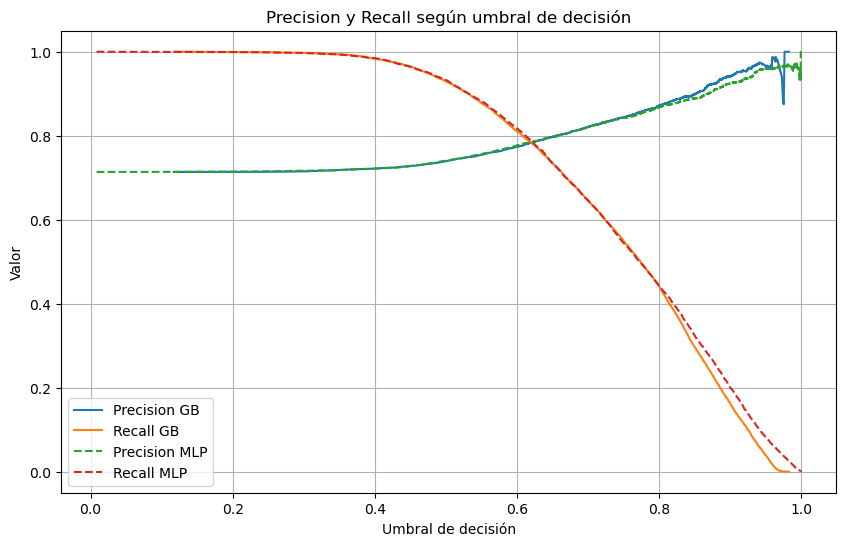

In [12]:
# Modelos optimizados
best_gb = GradientBoostingClassifier(
    learning_rate=0.0223,
    n_estimators=484,
    max_depth=3,
    subsample=0.6375,
    random_state=42
)

best_mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    alpha=1.1658e-05,
    learning_rate_init=0.00057,
    solver='adam',
    activation='relu',
    max_iter=300,
    random_state=42
)

# Cross-validation para obtener probabilidades
y_scores_gb = cross_val_predict(best_gb, X, y, cv=5, method='predict_proba')[:, 1]
y_scores_mlp = cross_val_predict(best_mlp, X, y, cv=5, method='predict_proba')[:, 1]

# Calcular curvas
precision_gb, recall_gb, thresholds_gb = precision_recall_curve(y, y_scores_gb)
precision_mlp, recall_mlp, thresholds_mlp = precision_recall_curve(y, y_scores_mlp)

# Grafico
plt.figure(figsize=(10, 6))
plt.plot(thresholds_gb, precision_gb[:-1], label='Precision GB')
plt.plot(thresholds_gb, recall_gb[:-1], label='Recall GB')

plt.plot(thresholds_mlp, precision_mlp[:-1], label='Precision MLP', linestyle='--')
plt.plot(thresholds_mlp, recall_mlp[:-1], label='Recall MLP', linestyle='--')

plt.xlabel('Umbral de decisión')
plt.ylabel('Valor')
plt.title('Precision y Recall según umbral de decisión')
plt.legend()
plt.grid(True)
plt.show()

##  Análisis de Precision y Recall según el Umbral de Decisión

La gráfica muestra cómo varían la **precisión** y el **recall** de los modelos optimizados (**Gradient Boosting** y **MLPClassifier**) en función del umbral de decisión aplicado a las probabilidades predichas.

###  Objetivo de esta exploración

- Evaluar cómo cambia el comportamiento del modelo cuando ajustamos el umbral de clasificación (por defecto es 0.5).
- Identificar si hay un punto de equilibrio entre **precision** y **recall**.
- Decidir si conviene modificar el umbral para mejorar el rendimiento según el objetivo del modelo.

---

##  Observaciones clave de la gráfica

- Cuando el **umbral es bajo** (cerca de 0.0), ambos modelos presentan:
  - **Recall alto** (cerca de 1.0): detectan casi todos los positivos.
  - **Precision baja**: hay muchos falsos positivos.

- Cuando el **umbral sube** hacia 1.0:
  - La **precisión aumenta**: los positivos predichos son más confiables.
  - El **recall cae**: se pierden muchas verdaderas clases positivas.



---

##  Conclusiones 

- La gráfica permite **ajustar el umbral de decisión de forma informada**: si el objetivo es **detectar con más seguridad cuándo gana el favorito** (más recall), se puede elegir un umbral bajo (ej. 0.4).
- Si en cambio se quiere **ser más preciso** al decir que el favorito gana (menos falsos positivos), se puede optar por umbrales más altos (ej. 0.6).


Segun el contexto se debe elegir un umbral u otro:
- **Si es más grave predecir que ganará el favorito cuando no lo hace** → prioriza **precision**.
- **Si es más importante detectar casi todas las veces que gana el favorito** → prioriza **recall**.


# Masters 1000 modelos

### Cargar dataframe para añadir columnas


In [3]:
# Ruta base del archivo
ruta_base = r"./Masters1000/columnas_añadidas"
# Nombre del archivo
nombre_archivo = "escaladofinal.csv"


In [4]:
ruta_completa = os.path.join(ruta_base, nombre_archivo)

# Leer el CSV correctamente
df = pd.read_csv(
    ruta_completa,
    delimiter=";",   # separador de columnas
    decimal=","      # separador decimal 
)

# Convertir fecha
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")

# Ordenar por fecha
df = df.sort_values(by="Date")

# Mostrar resumen
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14073 entries, 0 to 14072
Data columns (total 83 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ATP                           14073 non-null  float64       
 1   Location                      14073 non-null  object        
 2   Tournament                    14073 non-null  object        
 3   Date                          0 non-null      datetime64[ns]
 4   Series                        14073 non-null  object        
 5   Court                         14073 non-null  object        
 6   Surface                       14073 non-null  object        
 7   Surface_Carpet                14073 non-null  bool          
 8   Surface_Clay                  14073 non-null  bool          
 9   Surface_Hard                  14073 non-null  bool          
 10  Surface_WinRate_Favorite      14073 non-null  float64       
 11  Surface_WinRate_Not_Favorite

C:\Users\marco\AppData\Local\Temp\ipykernel_7668\3365750384.py:4: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


## Modelo Regresión Logistica (M1000)

In [5]:
# Lista de columnas a escalar
features_to_scale = [
    "Surface_WinRate_Favorite", "Surface_WinRate_Not_Favorite",
    "Surface_Matches_Favorite", "Surface_Matches_Not_Favorite",
    "WinStreak_Favorite", "WinStreak_Not_Favorite", "Win_Streak_Diff",
    "Rank_Favorite", "Rank_Not_Favorite", "Rank_Diff_Signed", "Rank_Diff_Abs",
    #"GrandSlams_Favorite", "GrandSlams_Not_Favorite"
    "Masters1000_Favorite","Masters1000_Not_Favorite"
]

# Asegurarse de que son numéricos
for col in features_to_scale:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Escalado con StandardScaler
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [6]:

# Contar los valores nulos por columna para comprobar que no haya nulos
print(df[features_to_scale + ["Favorite_Wins"]].isna().sum())

Surface_WinRate_Favorite        0
Surface_WinRate_Not_Favorite    0
Surface_Matches_Favorite        0
Surface_Matches_Not_Favorite    0
WinStreak_Favorite              0
WinStreak_Not_Favorite          0
Win_Streak_Diff                 0
Rank_Favorite                   0
Rank_Not_Favorite               0
Rank_Diff_Signed                0
Rank_Diff_Abs                   0
Masters1000_Favorite            0
Masters1000_Not_Favorite        0
Favorite_Wins                   0
dtype: int64


In [8]:

X = df[features_to_scale]  # Asegurarse de que no haya columnas extra
y = df["Favorite_Wins"]

In [9]:

#Comprobamos que no haya nulos en x ni en y
print("¿NaNs en X?:", X.isna().any().any()) 
print("¿NaNs en y?:", y.isna().any())

¿NaNs en X?: False
¿NaNs en y?: False


In [8]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Calcular y mostrar la métrica
score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", round(score, 3))


Balanced Accuracy: 0.517


In [9]:
print(y.value_counts(normalize=True))

Favorite_Wins
1    0.643218
0    0.356782
Name: proportion, dtype: float64


In [10]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística con ajuste por desbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluar con balanced accuracy
score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", round(score, 3))

Balanced Accuracy: 0.581


### Prueba con validación cruzada (M1000)

In [11]:
# Usamos solo las columnas que queremos escalar
X = df[features_to_scale]
y = df["Favorite_Wins"]  

# Modelo con validación cruzada (5 folds)
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# Evaluación
score_cv = balanced_accuracy_score(y, y_pred_cv)
print("Balanced Accuracy (CV):", round(score_cv, 3))

Balanced Accuracy (CV): 0.592


###  Evaluación del modelo Regresión logistica (M1000)

In [12]:
# Predicciones con validación cruzada
y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')
y_pred = (y_proba[:, 1] >= 0.5).astype(int)  # convertir probabilidades en clases

# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))


Accuracy: 0.589
Balanced Accuracy: 0.592
Precision: 0.724
Recall: 0.583
F1-Score: 0.646
AUC-ROC: 0.624
Log Loss: 0.671
Confusion Matrix:
 [[3013 2008]
 [3775 5277]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.60      0.51      5021
           1       0.72      0.58      0.65      9052

    accuracy                           0.59     14073
   macro avg       0.58      0.59      0.58     14073
weighted avg       0.62      0.59      0.60     14073



## Random Forest + validación cruzada (M1000)

In [13]:
# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Validación cruzada
y_proba_rf = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')
y_pred_rf = (y_proba_rf[:, 1] >= 0.5).astype(int)

In [14]:
# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_rf), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_rf), 3))
print("Precision:", round(precision_score(y, y_pred_rf), 3))
print("Recall:", round(recall_score(y, y_pred_rf), 3))
print("F1-Score:", round(f1_score(y, y_pred_rf), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_rf[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_rf[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_rf))
print("\nClassification Report:\n", classification_report(y, y_pred_rf))

Accuracy: 0.639
Balanced Accuracy: 0.543
Precision: 0.667
Recall: 0.877
F1-Score: 0.758
AUC-ROC: 0.61
Log Loss: 0.642
Confusion Matrix:
 [[1050 3971]
 [1111 7941]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.21      0.29      5021
           1       0.67      0.88      0.76      9052

    accuracy                           0.64     14073
   macro avg       0.58      0.54      0.52     14073
weighted avg       0.60      0.64      0.59     14073



## Modelo Gradient Boosting (M1000)

In [15]:
# Modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Validación cruzada
y_proba_gb = cross_val_predict(gb_model, X, y, cv=5, method='predict_proba')
y_pred_gb = (y_proba_gb[:, 1] >= 0.5).astype(int)


# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_gb), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_gb), 3))
print("Precision:", round(precision_score(y, y_pred_gb), 3))
print("Recall:", round(recall_score(y, y_pred_gb), 3))
print("F1-Score:", round(f1_score(y, y_pred_gb), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_gb[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_gb[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_gb))
print("\nClassification Report:\n", classification_report(y, y_pred_gb))

Accuracy: 0.65
Balanced Accuracy: 0.544
Precision: 0.666
Recall: 0.917
F1-Score: 0.771
AUC-ROC: 0.634
Log Loss: 0.625
Confusion Matrix:
 [[ 856 4165]
 [ 755 8297]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.17      0.26      5021
           1       0.67      0.92      0.77      9052

    accuracy                           0.65     14073
   macro avg       0.60      0.54      0.51     14073
weighted avg       0.62      0.65      0.59     14073



## Modelo Gradient Boosting balanceado (M1000)

In [16]:

gb_model = HistGradientBoostingClassifier(class_weight='balanced', max_iter=100, learning_rate=0.1, max_depth=6, random_state=42)

# Validación cruzada
y_proba_gb = cross_val_predict(gb_model, X, y, cv=5, method='predict_proba')
y_pred_gb = (y_proba_gb[:, 1] >= 0.5).astype(int)


print("Accuracy:", round(accuracy_score(y, y_pred_gb), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_gb), 3))
print("Precision:", round(precision_score(y, y_pred_gb), 3))
print("Recall:", round(recall_score(y, y_pred_gb), 3))
print("F1-Score:", round(f1_score(y, y_pred_gb), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_gb[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_gb[:, 1]), 3))

print("Confusion Matrix:\n", confusion_matrix(y, y_pred_gb))
print("\nClassification Report:\n", classification_report(y, y_pred_gb))

Accuracy: 0.588
Balanced Accuracy: 0.595
Precision: 0.73
Recall: 0.57
F1-Score: 0.64
AUC-ROC: 0.633
Log Loss: 0.659
Confusion Matrix:
 [[3110 1911]
 [3892 5160]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.62      0.52      5021
           1       0.73      0.57      0.64      9052

    accuracy                           0.59     14073
   macro avg       0.59      0.59      0.58     14073
weighted avg       0.63      0.59      0.60     14073



## MLPClassifier (M1000)

In [17]:
# Modelo MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # una capa oculta con 100 neuronas
    max_iter=300,
    alpha=1e-4,
    solver='adam',
    random_state=42
)

# Validación cruzada
y_proba_mlp = cross_val_predict(mlp_model, X, y, cv=5, method='predict_proba')
y_pred_mlp = (y_proba_mlp[:, 1] >= 0.5).astype(int)



# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_mlp), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_mlp), 3))
print("Precision:", round(precision_score(y, y_pred_mlp), 3))
print("Recall:", round(recall_score(y, y_pred_mlp), 3))
print("F1-Score:", round(f1_score(y, y_pred_mlp), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_mlp[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_mlp[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y, y_pred_mlp))


Accuracy: 0.642
Balanced Accuracy: 0.541
Precision: 0.665
Recall: 0.893
F1-Score: 0.762
AUC-ROC: 0.622
Log Loss: 0.634
Confusion Matrix:
 [[ 947 4074]
 [ 969 8083]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.19      0.27      5021
           1       0.66      0.89      0.76      9052

    accuracy                           0.64     14073
   macro avg       0.58      0.54      0.52     14073
weighted avg       0.60      0.64      0.59     14073



# MLPClassifier con SMOTE (M1000)

In [18]:
# 1. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 3. Entrenar MLP sobre datos balanceados
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_sm, y_train_sm)

# 4. Predecir sobre el test original
y_pred_mlp = mlp_model.predict(X_test)
y_proba_mlp = mlp_model.predict_proba(X_test)


# 5. Métricas
print("Accuracy:", round(accuracy_score(y_test, y_pred_mlp), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred_mlp), 3))
print("Precision:", round(precision_score(y_test, y_pred_mlp), 3))
print("Recall:", round(recall_score(y_test, y_pred_mlp), 3))
print("F1-Score:", round(f1_score(y_test, y_pred_mlp), 3))
print("AUC-ROC:", round(roc_auc_score(y_test, y_proba_mlp[:, 1]), 3))
print("Log Loss:", round(log_loss(y_test, y_proba_mlp[:, 1]), 3))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))

Accuracy: 0.571
Balanced Accuracy: 0.587
Precision: 0.723
Recall: 0.528
F1-Score: 0.611
AUC-ROC: 0.615
Log Loss: 0.684
Confusion Matrix:
 [[662 363]
 [844 946]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.65      0.52      1025
           1       0.72      0.53      0.61      1790

    accuracy                           0.57      2815
   macro avg       0.58      0.59      0.57      2815
weighted avg       0.62      0.57      0.58      2815



## Comparación entre modelos

| Modelo                    | Accuracy | Balanced Accuracy | Precision | Recall | F1-Score | AUC-ROC | Log Loss |
|--------------------------|----------|--------------------|-----------|--------|----------|---------|----------|
| Regresión Logística      | 0.589    | 0.592              | 0.724     | 0.583  | 0.646    | 0.624   | 0.671    |
| Random Forest            | 0.639    | 0.543              | 0.667     | 0.877  | 0.758    | 0.610   | 0.642    |
| Gradient Boosting        | 0.650    | 0.544              | 0.666     | 0.917  | 0.771    | 0.634   | 0.625    |
| Gradient Boosting (bal.) | 0.588    | 0.595              | 0.730     | 0.570  | 0.640    | 0.633   | 0.659    |
| MLPClassifier             | 0.642    | 0.541              | 0.665     | 0.893  | 0.762    | 0.622   | 0.634    |
| MLP + SMOTE              | 0.571    | 0.587              | 0.723     | 0.528  | 0.611    | 0.615   | 0.684    |


## Modelo Gradient Boosting con Optua (M1000)

In [24]:
#Objetivo de optimización
def objective(trial):
    # Hiperparámetros a optimizar
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    }

    # Validación cruzada
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []

    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        weights = compute_sample_weight(class_weight='balanced', y=y_train)

        model = GradientBoostingClassifier(
            **params,
            random_state=42
        )

        model.fit(X_train, y_train, sample_weight=weights)
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        aucs.append(auc)

    return np.mean(aucs)

# Crear y ejecutar estudio
study = optuna.create_study(direction='maximize', study_name='GB_AUC_Optimization')
study.optimize(objective, n_trials=100, n_jobs=1)  # subir n_trials para mejor resultado

# Mostrar mejor resultado
print(" Mejor AUC-ROC:", round(study.best_value, 4))
print(" Mejores hiperparámetros encontrados:")
print(study.best_params)

[I 2025-06-24 14:01:39,851] A new study created in memory with name: GB_AUC_Optimization
[I 2025-06-24 14:02:05,780] Trial 0 finished with value: 0.6374880383120087 and parameters: {'learning_rate': 0.018071692883046463, 'n_estimators': 136, 'max_depth': 9, 'subsample': 0.5233443667313019}. Best is trial 0 with value: 0.6374880383120087.
[I 2025-06-24 14:03:49,548] Trial 1 finished with value: 0.6302874938270442 and parameters: {'learning_rate': 0.01629404160736189, 'n_estimators': 480, 'max_depth': 8, 'subsample': 0.9559498881820476}. Best is trial 0 with value: 0.6374880383120087.
[I 2025-06-24 14:04:38,191] Trial 2 finished with value: 0.6108346044639928 and parameters: {'learning_rate': 0.09026033455765059, 'n_estimators': 162, 'max_depth': 10, 'subsample': 0.8639616256297911}. Best is trial 0 with value: 0.6374880383120087.
[I 2025-06-24 14:05:02,571] Trial 3 finished with value: 0.6271101661224976 and parameters: {'learning_rate': 0.07187897624388297, 'n_estimators': 283, 'max_de

 Mejor AUC-ROC: 0.6496
 Mejores hiperparámetros encontrados:
{'learning_rate': 0.011215234584834815, 'n_estimators': 392, 'max_depth': 4, 'subsample': 0.7922129095414916}


Mejor AUC-ROC: 0.6496
 Mejores hiperparámetros encontrados:
{'learning_rate': 0.011215234584834815, 'n_estimators': 392, 'max_depth': 4, 'subsample': 0.7922129095414916}

In [26]:
# Inicializar
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_proba = np.zeros(len(y))
y_pred = np.zeros(len(y))

# Validación cruzada manual con los mejores hiperparámetros encontrados
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    w = compute_sample_weight(class_weight='balanced', y=y_train)

    model = GradientBoostingClassifier(
        learning_rate=0.011215234584834815,
        n_estimators=392,
        max_depth=4,
        subsample=0.7922129095414916,
        random_state=42
    )

    model.fit(X_train, y_train, sample_weight=w)
    y_proba[test_idx] = model.predict_proba(X_test)[:, 1]
    y_pred[test_idx] = model.predict(X_test)

# Evaluación
y_pred = y_pred.astype(int)

print("MÉTRICAS DEL MODELO FINAL (Optuna):")
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba), 3))
print("Log Loss:", round(log_loss(y, y_proba), 3))
print("\nMatriz de Confusión:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

MÉTRICAS DEL MODELO FINAL (Optuna):
Accuracy: 0.594
Balanced Accuracy: 0.606
Precision: 0.743
Recall: 0.563
F1-Score: 0.641
AUC-ROC: 0.649
Log Loss: 0.654

Matriz de Confusión:
 [[3256 1765]
 [3953 5099]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.65      0.53      5021
           1       0.74      0.56      0.64      9052

    accuracy                           0.59     14073
   macro avg       0.60      0.61      0.59     14073
weighted avg       0.64      0.59      0.60     14073



| Métrica              | Gradient Boosting (Sin optimizar) | Gradient Boosting (Optuna) |
|----------------------|------------------------------------|-----------------------------|
| **Accuracy**         | 0.650                              | 0.594                       |
| **Balanced Accuracy**| 0.544                              | 0.606                       |
| **Precision**        | 0.666                              | 0.743                       |
| **Recall**           | 0.917                              | 0.563                       |
| **F1-Score**         | 0.771                              | 0.641                       |
| **AUC-ROC**          | 0.634                              | **0.649**                   |
| **Log Loss**         | 0.625                              | 0.654                       |

|                       | Matriz de Confusión                |
|-----------------------|-----------------------------------|
| **Sin optimizar**     | [[ 856, 4165], [ 755, 8297]]       |
| **Optuna optimizado** | [[3256, 1765], [3953, 5099]]       |

|                       | Conclusión                                              |
|-----------------------|----------------------------------------------------------------|
| **Sin optimizar**     | Muy alto recall, pero modelo sesgado hacia victorias del favorito. |
| **Optuna optimizado** | Menor recall pero mejor AUC y balanced accuracy; predicción más equilibrada. |


## MLPClassifier Optua (M1000)

In [27]:
# Mostrar progreso en consola
#optuna.logging.set_verbosity(optuna.logging.INFO)

# Objetivo de optimización
def objective(trial):
    params = {
        'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50), (100, 100)]),
        'alpha': trial.suggest_float('alpha', 1e-5, 1e-2, log=True),
        'learning_rate_init': trial.suggest_float('learning_rate_init', 0.0005, 0.1, log=True),
        'solver': trial.suggest_categorical('solver', ['adam', 'sgd']),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh'])
    }

    aucs = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = MLPClassifier(
            **params,
            max_iter=300,
            random_state=42
        )

        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        aucs.append(auc)

    return np.mean(aucs)

# Crear estudio y optimizar
study = optuna.create_study(direction='maximize', study_name='MLP_AUC_Optimization')
study.optimize(objective, n_trials=150, n_jobs=1)  

# Mostrar mejores resultados
print("Mejor AUC-ROC:", round(study.best_value, 4))
print("Mejores hiperparámetros encontrados:")
print(study.best_params)


[I 2025-06-24 17:13:49,292] A new study created in memory with name: MLP_AUC_Optimization
C:\Users\marco\miniconda3\envs\tfg\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\marco\miniconda3\envs\tfg\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\marco\miniconda3\envs\tfg\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\marco\miniconda3\envs\tfg\Lib\site-packages\optuna\distributions.p

Mejor AUC-ROC: 0.638
Mejores hiperparámetros encontrados:
{'hidden_layer_sizes': (50,), 'alpha': 0.002854303279912305, 'learning_rate_init': 0.003089711339816946, 'solver': 'sgd', 'activation': 'relu'}


Mejor AUC-ROC: 0.638
Mejores hiperparámetros encontrados:
{'hidden_layer_sizes': (50,), 'alpha': 0.002854303279912305, 'learning_rate_init': 0.003089711339816946, 'solver': 'sgd', 'activation': 'relu'}

In [10]:
# 1. Modelo con los mejores hiperparámetros encontrados por Optuna
best_mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    alpha=0.002854303279912305,
    learning_rate_init=0.003089711339816946,
    solver='sgd',
    activation='relu',
    max_iter=300,
    random_state=42
)

# 2. Validación cruzada (probabilidades)
y_proba = cross_val_predict(best_mlp, X, y, cv=5, method='predict_proba')
y_pred = (y_proba[:, 1] >= 0.5).astype(int)

# 3. Métricas
print("MÉTRICAS DEL MLP OPTIMIZADO (Optuna actualizado):")
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba[:, 1]), 3))

# 4. Matriz de confusión
print("\nMatriz de Confusión:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

MÉTRICAS DEL MLP OPTIMIZADO (Optuna actualizado):
Accuracy: 0.647
Balanced Accuracy: 0.535
Precision: 0.661
Recall: 0.927
F1-Score: 0.772
AUC-ROC: 0.635
Log Loss: 0.625

Matriz de Confusión:
 [[ 716 4305]
 [ 659 8393]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.14      0.22      5021
           1       0.66      0.93      0.77      9052

    accuracy                           0.65     14073
   macro avg       0.59      0.53      0.50     14073
weighted avg       0.61      0.65      0.58     14073



| Métrica              | MLP (Sin optimizar)               | MLP (Optuna)               |
|----------------------|-----------------------------------|----------------------------|
| **Accuracy**         | 0.642                             | 0.647                      |
| **Balanced Accuracy**| 0.541                             | 0.535                      |
| **Precision**        | 0.665                             | 0.661                      |
| **Recall**           | 0.893                             | 0.927                      |
| **F1-Score**         | 0.762                             | 0.772                      |
| **AUC-ROC**          | 0.622                             | **0.635**                  |
| **Log Loss**         | 0.634                             | 0.625                      |

|                       | Matriz de Confusión               |
|-----------------------|----------------------------------|
| **Sin optimizar**     | [[ 947, 4074], [ 969, 8083]]      |
| **Optuna optimizado** | [[ 716, 4305], [ 659, 8393]]      |

|                       | Conclusión                                                  |
|-----------------------|-------------------------------------------------------------|
| **Sin optimizar**     | Buen F1, pero bajo rendimiento en derrotas del favorito.    |
| **Optuna optimizado** | AUC y recall mejorados; más fiable prediciendo victorias.  |


# Comparación mejores modelos GrandSlam y ATP Master1000

| Métrica               | Grand Slams (GB Optuna) | Masters 1000 (GB Optuna) |
|-----------------------|-------------------------|---------------------------|
| **Accuracy**          | 0.643                   | 0.594                     |
| **Balanced Accuracy** | **0.658**               | 0.606                     |
| **Precision**         | **0.835**               | 0.743                     |
| **Recall**            | 0.623                   | 0.563                     |
| **F1-Score**          | 0.714                   | 0.641                     |
| **AUC-ROC**           | **0.713**               | 0.649                     |
| **Log Loss**          | 0.613                   | 0.654                     |

|                           | Matriz de Confusión              |
|---------------------------|----------------------------------|
| **Grand Slams (GB Optuna)** | [[2546, 1125], [3453, 5703]]     |
| **Masters 1000 (GB Optuna)**| [[3256, 1765], [3953, 5099]]     |

### Conclusión Final

- El modelo optimizado con **Gradient Boosting + Optuna** para **Grand Slams** logra **el mejor AUC-ROC (0.713)** y también destaca en **Balanced Accuracy y Precision**, lo que indica que es más capaz de distinguir entre clases y equilibrar el sesgo.
- El modelo equivalente para **Masters 1000** también mejora respecto al no optimizado, pero su rendimiento sigue siendo inferior en AUC-ROC, F1 y Balanced Accuracy.
- **Conclusión**: Aunque los **Masters 1000** tienen más datos, los **Grand Slams resultan más predecibles** desde el punto de vista del modelo, especialmente en cuanto a su capacidad de clasificación general medida por AUC-ROC.


# Modelo Conjunto GrandSlams + Masters1000

## Modelo Regresión Logistica (GS + M1000)

In [6]:



# Lista de columnas a escalar
features_to_scale = [
    "Surface_WinRate_Favorite", "Surface_WinRate_Not_Favorite",
    "Surface_Matches_Favorite", "Surface_Matches_Not_Favorite",
    "WinStreak_Favorite", "WinStreak_Not_Favorite", "Win_Streak_Diff",
    "Rank_Favorite", "Rank_Not_Favorite", "Rank_Diff_Signed", "Rank_Diff_Abs",
    "GrandSlams_Favorite", "GrandSlams_Not_Favorite",
    "Masters1000_Favorite","Masters1000_Not_Favorite"
]

# Asegurarse de que son numéricos
for col in features_to_scale:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Escalado con StandardScaler
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [7]:
# Contar los valores nulos por columna para comprobar que no haya nulos
print(df[features_to_scale + ["Favorite_Wins"]].isna().sum())

Surface_WinRate_Favorite        0
Surface_WinRate_Not_Favorite    0
Surface_Matches_Favorite        0
Surface_Matches_Not_Favorite    0
WinStreak_Favorite              0
WinStreak_Not_Favorite          0
Win_Streak_Diff                 0
Rank_Favorite                   0
Rank_Not_Favorite               0
Rank_Diff_Signed                0
Rank_Diff_Abs                   0
GrandSlams_Favorite             0
GrandSlams_Not_Favorite         0
Masters1000_Favorite            0
Masters1000_Not_Favorite        0
Favorite_Wins                   0
dtype: int64


In [8]:
X = df[features_to_scale]  # Asegurarse de que no haya columnas extra
y = df["Favorite_Wins"]

In [9]:
#Comprobamos que no haya nulos en x ni en y
print("¿NaNs en X?:", X.isna().any().any()) 
print("¿NaNs en y?:", y.isna().any())

¿NaNs en X?: False
¿NaNs en y?: False


In [63]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Calcular y mostrar la métrica
score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", round(score, 3))

Balanced Accuracy: 0.531


In [64]:
print(y.value_counts(normalize=True))

Favorite_Wins
1    0.676877
0    0.323123
Name: proportion, dtype: float64


In [65]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística con ajuste por desbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluar con balanced accuracy
score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", round(score, 3))

Balanced Accuracy: 0.6


In [66]:
#Prueba con validación cruzada

# Usamos solo las columnas que queremos escalar
X = df[features_to_scale]
y = df["Favorite_Wins"]  

# Modelo con validación cruzada (5 folds)
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# Evaluación
score_cv = balanced_accuracy_score(y, y_pred_cv)
print("Balanced Accuracy (CV):", round(score_cv, 3))

Balanced Accuracy (CV): 0.615


### Evaluación del modelo Regresión Logística (GS + M1000)

In [67]:
# Predicciones con validación cruzada
y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')
y_pred = (y_proba[:, 1] >= 0.5).astype(int)  # convertir probabilidades en clases

# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

Accuracy: 0.612
Balanced Accuracy: 0.615
Precision: 0.771
Recall: 0.608
F1-Score: 0.68
AUC-ROC: 0.657
Log Loss: 0.656
Confusion Matrix:
 [[ 5405  3287]
 [ 7146 11062]]

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.62      0.51      8692
           1       0.77      0.61      0.68     18208

    accuracy                           0.61     26900
   macro avg       0.60      0.61      0.59     26900
weighted avg       0.66      0.61      0.62     26900



## Random Forest + validación cruzada (GS + M1000)

In [68]:
# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Validación cruzada
y_proba_rf = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')
y_pred_rf = (y_proba_rf[:, 1] >= 0.5).astype(int)


In [69]:
# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_rf), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_rf), 3))
print("Precision:", round(precision_score(y, y_pred_rf), 3))
print("Recall:", round(recall_score(y, y_pred_rf), 3))
print("F1-Score:", round(f1_score(y, y_pred_rf), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_rf[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_rf[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_rf))
print("\nClassification Report:\n", classification_report(y, y_pred_rf))

Accuracy: 0.673
Balanced Accuracy: 0.548
Precision: 0.701
Recall: 0.901
F1-Score: 0.789
AUC-ROC: 0.646
Log Loss: 0.606
Confusion Matrix:
 [[ 1706  6986]
 [ 1809 16399]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.20      0.28      8692
           1       0.70      0.90      0.79     18208

    accuracy                           0.67     26900
   macro avg       0.59      0.55      0.53     26900
weighted avg       0.63      0.67      0.62     26900



## Modelo Gradient Boosting (GS + M1000)

In [70]:
# Modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Validación cruzada
y_proba_gb = cross_val_predict(gb_model, X, y, cv=5, method='predict_proba')
y_pred_gb = (y_proba_gb[:, 1] >= 0.5).astype(int)


# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_gb), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_gb), 3))
print("Precision:", round(precision_score(y, y_pred_gb), 3))
print("Recall:", round(recall_score(y, y_pred_gb), 3))
print("F1-Score:", round(f1_score(y, y_pred_gb), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_gb[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_gb[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_gb))
print("\nClassification Report:\n", classification_report(y, y_pred_gb))

Accuracy: 0.679
Balanced Accuracy: 0.545
Precision: 0.699
Recall: 0.925
F1-Score: 0.796
AUC-ROC: 0.671
Log Loss: 0.589
Confusion Matrix:
 [[ 1436  7256]
 [ 1366 16842]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.17      0.25      8692
           1       0.70      0.92      0.80     18208

    accuracy                           0.68     26900
   macro avg       0.61      0.55      0.52     26900
weighted avg       0.64      0.68      0.62     26900



## Modelo Gradient Boosting balanceado (GS + M1000)

In [71]:
gb_model = HistGradientBoostingClassifier(class_weight='balanced', max_iter=100, learning_rate=0.1, max_depth=6, random_state=42)

# Validación cruzada
y_proba_gb = cross_val_predict(gb_model, X, y, cv=5, method='predict_proba')
y_pred_gb = (y_proba_gb[:, 1] >= 0.5).astype(int)


print("Accuracy:", round(accuracy_score(y, y_pred_gb), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_gb), 3))
print("Precision:", round(precision_score(y, y_pred_gb), 3))
print("Recall:", round(recall_score(y, y_pred_gb), 3))
print("F1-Score:", round(f1_score(y, y_pred_gb), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_gb[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_gb[:, 1]), 3))

print("Confusion Matrix:\n", confusion_matrix(y, y_pred_gb))
print("\nClassification Report:\n", classification_report(y, y_pred_gb))

Accuracy: 0.608
Balanced Accuracy: 0.625
Precision: 0.787
Recall: 0.577
F1-Score: 0.666
AUC-ROC: 0.669
Log Loss: 0.64
Confusion Matrix:
 [[ 5852  2840]
 [ 7702 10506]]

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.67      0.53      8692
           1       0.79      0.58      0.67     18208

    accuracy                           0.61     26900
   macro avg       0.61      0.63      0.60     26900
weighted avg       0.67      0.61      0.62     26900



## MLPClassifier (GS + M1000)

In [72]:
# Modelo MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # una capa oculta con 100 neuronas
    max_iter=300,
    alpha=1e-4,
    solver='adam',
    random_state=42
)

# Validación cruzada
y_proba_mlp = cross_val_predict(mlp_model, X, y, cv=5, method='predict_proba')
y_pred_mlp = (y_proba_mlp[:, 1] >= 0.5).astype(int)

In [73]:
# Métricas
print("Accuracy:", round(accuracy_score(y, y_pred_mlp), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred_mlp), 3))
print("Precision:", round(precision_score(y, y_pred_mlp), 3))
print("Recall:", round(recall_score(y, y_pred_mlp), 3))
print("F1-Score:", round(f1_score(y, y_pred_mlp), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba_mlp[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba_mlp[:, 1]), 3))

# Matriz de confusión e informe
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y, y_pred_mlp))

Accuracy: 0.679
Balanced Accuracy: 0.555
Precision: 0.704
Recall: 0.906
F1-Score: 0.793
AUC-ROC: 0.666
Log Loss: 0.596
Confusion Matrix:
 [[ 1768  6924]
 [ 1703 16505]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.20      0.29      8692
           1       0.70      0.91      0.79     18208

    accuracy                           0.68     26900
   macro avg       0.61      0.55      0.54     26900
weighted avg       0.64      0.68      0.63     26900



## MLPClassifier con SMOTE (GS + M1000)

In [74]:
# 1. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 3. Entrenar MLP sobre datos balanceados
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_sm, y_train_sm)

# 4. Predecir sobre el test original
y_pred_mlp = mlp_model.predict(X_test)
y_proba_mlp = mlp_model.predict_proba(X_test)


# 5. Métricas
print("Accuracy:", round(accuracy_score(y_test, y_pred_mlp), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred_mlp), 3))
print("Precision:", round(precision_score(y_test, y_pred_mlp), 3))
print("Recall:", round(recall_score(y_test, y_pred_mlp), 3))
print("F1-Score:", round(f1_score(y_test, y_pred_mlp), 3))
print("AUC-ROC:", round(roc_auc_score(y_test, y_proba_mlp[:, 1]), 3))
print("Log Loss:", round(log_loss(y_test, y_proba_mlp[:, 1]), 3))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))

Accuracy: 0.596
Balanced Accuracy: 0.613
Precision: 0.776
Recall: 0.564
F1-Score: 0.653
AUC-ROC: 0.653
Log Loss: 0.669
Confusion Matrix:
 [[1156  592]
 [1584 2048]]

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.66      0.52      1748
           1       0.78      0.56      0.65      3632

    accuracy                           0.60      5380
   macro avg       0.60      0.61      0.58      5380
weighted avg       0.66      0.60      0.61      5380



| Modelo                    | Accuracy | Balanced Accuracy | Precision | Recall | F1-Score | AUC-ROC | Log Loss |
|--------------------------|----------|--------------------|-----------|--------|----------|---------|----------|
| Regresión Logística      | 0.612    | 0.615              | 0.771     | 0.608  | 0.680    | 0.657   | 0.656    |
| Random Forest            | 0.673    | 0.548              | 0.701     | 0.901  | 0.789    | 0.646   | 0.606    |
| Gradient Boosting        | 0.679    | 0.545              | 0.699     | 0.925  | 0.796    | **0.671** | 0.589 |
| Gradient Boosting (bal.) | 0.608    | 0.625              | 0.787 | 0.577  | 0.666    | 0.669   | 0.640    |
| MLPClassifier            | 0.679    | 0.555              | 0.704     | 0.906  | 0.793    | **0.666**   | 0.596    |
| MLP + SMOTE              | 0.596    | 0.613              | 0.776     | 0.564  | 0.653    | 0.653   | 0.669    |


## Mejora de Modelos con mas AUC-ROC : Gradient Bossting y MLPClassifier (GS + M1000)

## Modelo Gradient Boosting con Optua (GS + M1000)

In [77]:
#Objetivo de optimización
def objective(trial):
    # Hiperparámetros a optimizar
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    }

    # Validación cruzada
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []

    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        weights = compute_sample_weight(class_weight='balanced', y=y_train)

        model = GradientBoostingClassifier(
            **params,
            random_state=42
        )

        model.fit(X_train, y_train, sample_weight=weights)
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        aucs.append(auc)

    return np.mean(aucs)

# Crear y ejecutar estudio
study = optuna.create_study(direction='maximize', study_name='GB_AUC_Optimization')
study.optimize(objective, n_trials=100, n_jobs=1)  # subir n_trials para mejor resultado

# Mostrar mejor resultado
print(" Mejor AUC-ROC:", round(study.best_value, 4))
print(" Mejores hiperparámetros encontrados:")
print(study.best_params)

[I 2025-06-26 14:14:45,663] A new study created in memory with name: GB_AUC_Optimization
[I 2025-06-26 14:16:05,666] Trial 0 finished with value: 0.6659627131936043 and parameters: {'learning_rate': 0.04425216260061243, 'n_estimators': 387, 'max_depth': 6, 'subsample': 0.6540870974067807}. Best is trial 0 with value: 0.6659627131936043.
[I 2025-06-26 14:18:40,453] Trial 1 finished with value: 0.6487876471058518 and parameters: {'learning_rate': 0.03896627369924173, 'n_estimators': 440, 'max_depth': 9, 'subsample': 0.6338074757729886}. Best is trial 0 with value: 0.6659627131936043.
[I 2025-06-26 14:19:00,024] Trial 2 finished with value: 0.6708152076117765 and parameters: {'learning_rate': 0.006262874958887341, 'n_estimators': 103, 'max_depth': 4, 'subsample': 0.981781282700686}. Best is trial 2 with value: 0.6708152076117765.
[I 2025-06-26 14:20:31,763] Trial 3 finished with value: 0.6763135335821482 and parameters: {'learning_rate': 0.015337450112081194, 'n_estimators': 311, 'max_dep

 Mejor AUC-ROC: 0.6818
 Mejores hiperparámetros encontrados:
{'learning_rate': 0.014538386775171604, 'n_estimators': 475, 'max_depth': 4, 'subsample': 0.5162888716243986}


In [ ]:
 Mejor AUC-ROC: 0.6818
 Mejores hiperparámetros encontrados:
{'learning_rate': 0.014538386775171604, 'n_estimators': 475, 'max_depth': 4, 'subsample': 0.5162888716243986}

In [12]:
# Inicializar
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_proba = np.zeros(len(y))
y_pred = np.zeros(len(y))

# Validación cruzada manual con los mejores hiperparámetros encontrados
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    w = compute_sample_weight(class_weight='balanced', y=y_train)

    model = GradientBoostingClassifier(
        learning_rate=0.014538386775171604,
        n_estimators=475,
        max_depth=4,
        subsample=0.5162888716243986,
        random_state=42
    )

    model.fit(X_train, y_train, sample_weight=w)
    y_proba[test_idx] = model.predict_proba(X_test)[:, 1]
    y_pred[test_idx] = model.predict(X_test)

# Evaluación
y_pred = y_pred.astype(int)

print("MÉTRICAS DEL MODELO FINAL (Optuna):")
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba), 3))
print("Log Loss:", round(log_loss(y, y_proba), 3))
print("\nMatriz de Confusión:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

MÉTRICAS DEL MODELO FINAL (Optuna):
Accuracy: 0.613
Balanced Accuracy: 0.631
Precision: 0.792
Recall: 0.581
F1-Score: 0.67
AUC-ROC: 0.682
Log Loss: 0.636

Matriz de Confusión:
 [[ 5918  2774]
 [ 7635 10573]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.68      0.53      8692
           1       0.79      0.58      0.67     18208

    accuracy                           0.61     26900
   macro avg       0.61      0.63      0.60     26900
weighted avg       0.68      0.61      0.63     26900



## MLPClassifier Optua (GS + M1000)

In [10]:

# Mostrar progreso en consola
#optuna.logging.set_verbosity(optuna.logging.INFO)

# Objetivo de optimización
def objective(trial):
    params = {
        'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50), (100, 100)]),
        'alpha': trial.suggest_float('alpha', 1e-5, 1e-2, log=True),
        'learning_rate_init': trial.suggest_float('learning_rate_init', 0.0005, 0.1, log=True),
        'solver': trial.suggest_categorical('solver', ['adam', 'sgd']),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh'])
    }

    aucs = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = MLPClassifier(
            **params,
            max_iter=300,
            random_state=42
        )

        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        aucs.append(auc)

    return np.mean(aucs)

# Crear estudio y optimizar
study = optuna.create_study(direction='maximize', study_name='MLP_AUC_Optimization')
study.optimize(objective, n_trials=150, n_jobs=1)  

# Mostrar mejores resultados
print("Mejor AUC-ROC:", round(study.best_value, 4))
print("Mejores hiperparámetros encontrados:")
print(study.best_params)

[I 2025-06-26 16:39:15,310] A new study created in memory with name: MLP_AUC_Optimization
C:\Users\marco\miniconda3\envs\tfg\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\marco\miniconda3\envs\tfg\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\marco\miniconda3\envs\tfg\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\marco\miniconda3\envs\tfg\Lib\site-packages\optuna\distributions.p

Mejor AUC-ROC: 0.6777
Mejores hiperparámetros encontrados:
{'hidden_layer_sizes': (100, 50), 'alpha': 0.007356732091984054, 'learning_rate_init': 0.003647090832896848, 'solver': 'sgd', 'activation': 'tanh'}


Mejor AUC-ROC: 0.6777
Mejores hiperparámetros encontrados:
{'hidden_layer_sizes': (100, 50), 'alpha': 0.007356732091984054, 'learning_rate_init': 0.003647090832896848, 'solver': 'sgd', 'activation': 'tanh'}

In [10]:
# 1. Modelo con los mejores hiperparámetros encontrados por Optuna
best_mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    alpha=0.007356732091984054,
    learning_rate_init=0.003647090832896848,
    solver='sgd',
    activation='tanh',
    max_iter=300,
    random_state=42
)

# 2. Validación cruzada (probabilidades)
y_proba = cross_val_predict(best_mlp, X, y, cv=5, method='predict_proba')
y_pred = (y_proba[:, 1] >= 0.5).astype(int)

# 3. Métricas
print("MÉTRICAS DEL MLP OPTIMIZADO (Optuna actualizado):")
print("Accuracy:", round(accuracy_score(y, y_pred), 3))
print("Balanced Accuracy:", round(balanced_accuracy_score(y, y_pred), 3))
print("Precision:", round(precision_score(y, y_pred), 3))
print("Recall:", round(recall_score(y, y_pred), 3))
print("F1-Score:", round(f1_score(y, y_pred), 3))
print("AUC-ROC:", round(roc_auc_score(y, y_proba[:, 1]), 3))
print("Log Loss:", round(log_loss(y, y_proba[:, 1]), 3))

# 4. Matriz de confusión
print("\nMatriz de Confusión:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))


MÉTRICAS DEL MLP OPTIMIZADO (Optuna actualizado):
Accuracy: 0.682
Balanced Accuracy: 0.545
Precision: 0.698
Recall: 0.934
F1-Score: 0.799
AUC-ROC: 0.672
Log Loss: 0.588

Matriz de Confusión:
 [[ 1352  7340]
 [ 1207 17001]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.16      0.24      8692
           1       0.70      0.93      0.80     18208

    accuracy                           0.68     26900
   macro avg       0.61      0.54      0.52     26900
weighted avg       0.64      0.68      0.62     26900



| Modelo                    | Accuracy | Balanced Accuracy | Precision | Recall | F1-Score | AUC-ROC | Log Loss |
|--------------------------|----------|--------------------|-----------|--------|----------|---------|----------|
| Gradient Boosting (Optuna) | 0.613    | **0.631**          | **0.792** | 0.581  | 0.670    | **0.682** | 0.636    |
| MLPClassifier (Optuna)     | **0.682**| 0.545              | 0.698     | **0.934** | **0.799** | 0.672   | **0.588** |


### Comparativa de los Mejores Modelos por AUC-ROC

| Métrica               | Grand Slams (GB Optuna) | Masters 1000 (GB Optuna) | GS + M1000 (GB Optuna) | GS + M1000 (MLP Optuna) |
|-----------------------|-------------------------|---------------------------|-------------------------|--------------------------|
| **Accuracy**          | 0.643                   | 0.594                     | 0.613                   | **0.682**                |
| **Balanced Accuracy** | **0.658**               | 0.606                     | **0.631**               | 0.545                    |
| **Precision**         | **0.835**               | 0.743                     | **0.792**               | 0.698                    |
| **Recall**            | 0.623                   | 0.563                     | 0.581                   | **0.934**                |
| **F1-Score**          | 0.714                   | 0.641                     | 0.670                   | **0.799**                |
| **AUC-ROC**           | **0.713**               | 0.649                     | **0.682**               | 0.672                    |
| **Log Loss**          | 0.613                   | 0.654                     | 0.636                   | **0.588**                |

---

### Conclusión Final

- El modelo **Gradient Boosting con Optuna en Grand Slams** sigue siendo el mejor en cuanto a **AUC-ROC (0.713)**, además de tener el **mejor balance entre precisión y sensibilidad**.
- El modelo **combinado (Grand Slams + Masters 1000)** mejora el recall al usar MLP optimizado y alcanza el **mejor F1-Score y Accuracy**, aunque pierde en Balanced Accuracy y AUC.
- El conjunto de **Masters 1000** es el más difícil de predecir en términos de AUC-ROC y precisión general.
- Si el objetivo es **máxima discriminación entre clases (AUC-ROC)**, el modelo de Grand Slams con Gradient Boosting es el mejor. Si se prioriza **recall o F1**, el modelo MLP conjunto es más potente.


# Comparación entre modelos entrenados con diferentes datasets
# Modelo Conjunto (GS + M1000) o Modelo GrandSlam

En este apartado se evaluará si conviene entrenar modelos específicos por tipo de torneo (como Grand Slams) o si un modelo conjunto entrenado con torneos de tipo **Grand Slam + Masters 1000** puede generalizar mejor a los partidos de alto nivel.

####  Objetivo
Comparar el rendimiento de dos modelos de **Gradient Boosting (Optuna)** sobre el mismo conjunto de test: **partidos de Grand Slams**.

- 🔹 **Modelo 1**: Entrenado exclusivamente con datos de torneos **Grand Slam**.
- 🔹 **Modelo 2**: Entrenado con partidos de **Grand Slam + Masters 1000**.

Ambos modelos han sido optimizados con **Optuna** y sus hiperparámetros fueron ajustados para maximizar el AUC-ROC.

####  Proceso
1. Se filtra el dataset para quedarnos únicamente con los partidos de **Grand Slams**.
2. Se utilizan ambos modelos ya entrenados para predecir sobre ese conjunto.
3. Se comparan las métricas :  
   - Accuracy  
   - Balanced Accuracy  
   - Precision  
   - Recall  
   - F1-Score  
   - AUC-ROC  
   - Log Loss  

Este análisis permite responder la siguiente pregunta clave del proyecto:

> ¿Es preferible entrenar modelos específicos por tipo de torneo o uno conjunto para todos?

Un mejor rendimiento del modelo conjunto sobre los datos de Grand Slams indicaría una **mejor generalización** al beneficiarse de un mayor volumen y variedad de datos. Por el contrario, si el modelo entrenado solo con datos de Grand Slams ofrece mejores métricas, esto sugiere que la especialización por tipo de torneo puede ser más eficaz para predecir su resultado.


In [30]:
# === Paso 1: Cargar el dataset ===
ruta_base = r"./Modelo_Completo/columnas_añadidas"
nombre_archivo = "escaladofinal.csv"
ruta_completa = os.path.join(ruta_base, nombre_archivo)

df = pd.read_csv(
    ruta_completa,
    delimiter=";",   # separador de columnas
    decimal=","      # separador decimal 
)

df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")
df = df.sort_values(by="Date")

# === Corregir comas decimales en las columnas numéricas ===
features = [
    "Surface_WinRate_Favorite", "Surface_WinRate_Not_Favorite",
    "Surface_Matches_Favorite", "Surface_Matches_Not_Favorite",
    "WinStreak_Favorite", "WinStreak_Not_Favorite", "Win_Streak_Diff",
    "Rank_Favorite", "Rank_Not_Favorite", "Rank_Diff_Signed", "Rank_Diff_Abs",
    "Masters1000_Favorite", "Masters1000_Not_Favorite",
    "GrandSlams_Favorite", "GrandSlams_Not_Favorite"
]

for col in features:
    if df[col].dtype == object:
        df[col] = df[col].str.replace(',', '.').astype(float)

# === Separar datos ===
df_gs = df[df["Series"] == "Grand Slam"].copy()
df_comb = df[df["Series"].isin(["Grand Slam", "Masters 1000"])].copy()

X_gs = df_gs[features]
y_gs = df_gs["Favorite_Wins"]
X_comb = df_comb[features]
y_comb = df_comb["Favorite_Wins"]

# === Entrenar modelo combinado (fuera del loop para acelerar) ===
w_comb = compute_sample_weight(class_weight='balanced', y=y_comb)
modelo_combinado = GradientBoostingClassifier(
    learning_rate=0.014538386775171604,
    n_estimators=475,
    max_depth=4,
    subsample=0.5162888716243986,
    random_state=42
)
modelo_combinado.fit(X_comb, y_comb, sample_weight=w_comb)

# === Validación cruzada solo en partidos de GS ===
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_gs = np.zeros(len(y_gs))
y_proba_gs = np.zeros(len(y_gs))
y_pred_comb = np.zeros(len(y_gs))
y_proba_comb = np.zeros(len(y_gs))

for train_idx, test_idx in kf.split(X_gs, y_gs):
    X_train, X_test = X_gs.iloc[train_idx], X_gs.iloc[test_idx]
    y_train, y_test = y_gs.iloc[train_idx], y_gs.iloc[test_idx]
    w = compute_sample_weight(class_weight='balanced', y=y_train)

    modelo_gs = GradientBoostingClassifier(
        learning_rate=0.0222992728201512,
        n_estimators=484,
        max_depth=3,
        subsample=0.6374765489547842,
        random_state=42
    )
    modelo_gs.fit(X_train, y_train, sample_weight=w)

    y_pred_gs[test_idx] = modelo_gs.predict(X_test)
    y_proba_gs[test_idx] = modelo_gs.predict_proba(X_test)[:, 1]

    y_pred_comb[test_idx] = modelo_combinado.predict(X_test)
    y_proba_comb[test_idx] = modelo_combinado.predict_proba(X_test)[:, 1]

# === Función de evaluación ===
def evaluar(nombre, y_true, y_pred, y_proba):
    print(f"\n--- {nombre} ---")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Balanced Accuracy:", round(balanced_accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1 Score:", round(f1_score(y_true, y_pred), 3))
    print("AUC-ROC:", round(roc_auc_score(y_true, y_proba), 3))
    print("Log Loss:", round(log_loss(y_true, y_proba), 3))
    print("Matriz de Confusión:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# === Resultados ===
y_true = y_gs.to_numpy()
evaluar("Modelo SOLO Grand Slams", y_true, y_pred_gs.astype(int), y_proba_gs)
evaluar("Modelo COMBINADO (entrenado en GS + M1000)", y_true, y_pred_comb.astype(int), y_proba_comb)


--- Modelo SOLO Grand Slams ---
Accuracy: 0.641
Balanced Accuracy: 0.656
Precision: 0.834
Recall: 0.62
F1 Score: 0.711
AUC-ROC: 0.713
Log Loss: 0.612
Matriz de Confusión:
 [[2539 1132]
 [3478 5678]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.69      0.52      3671
           1       0.83      0.62      0.71      9156

    accuracy                           0.64     12827
   macro avg       0.63      0.66      0.62     12827
weighted avg       0.72      0.64      0.66     12827


--- Modelo COMBINADO (entrenado en GS + M1000) ---
Accuracy: 0.669
Balanced Accuracy: 0.685
Precision: 0.853
Recall: 0.648
F1 Score: 0.737
AUC-ROC: 0.752
Log Loss: 0.585
Matriz de Confusión:
 [[2649 1022]
 [3219 5937]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.72      0.56      3671
           1       0.85      0.65      0.74      9156

    accuracy                           0.

###  Comparativa de Modelos: Evaluación sobre Partidos de Grand Slams

| Métrica               | GB (Solo GS) | GB (GS + M1000) |
|-----------------------|--------------|------------------|
| **Accuracy**          | 0.641        | **0.669**        |
| **Balanced Accuracy** | 0.656        | **0.685**        |
| **Precision**         | 0.834        | **0.853**        |
| **Recall**            | 0.620        | **0.648**        |
| **F1-Score**          | 0.711        | **0.737**        |
| **AUC-ROC**           | 0.713        | **0.752**        |
| **Log Loss**          | 0.612        | **0.585**        |

---

###  Evaluación del modelo combinado sobre todos los torneos (GS + M1000)

| Métrica               | Valor         |
|-----------------------|---------------|
| **Accuracy**          | 0.613         |
| **Balanced Accuracy** | 0.631         |
| **Precision**         | 0.792         |
| **Recall**            | 0.581         |
| **F1-Score**          | 0.670         |
| **AUC-ROC**           | 0.682         |
| **Log Loss**          | 0.636         |

---

###  Conclusiones sobre Grand Slams

- El modelo **combinado (entrenado con Grand Slams + Masters 1000)** mejora claramente en todos los aspectos cuando se evalúa exclusivamente en partidos de Grand Slam:
  - **Mejor discriminación (AUC-ROC: 0.752)**
  - **Mayor precisión y recall**
  - **Menor log loss**

- Esto indica que los datos de Masters 1000 **aportan conocimiento útil que generaliza bien hacia los partidos de Grand Slam**, posiblemente porque:
  - Ambos tipos de torneos son de alto nivel competitivo.
  - Jugadores y condiciones similares permiten al modelo extraer patrones adicionales que no estaban presentes solo en los Grand Slams.

---

### ¿Por qué el modelo combinado rinde peor cuando se le evalúa sobre *todos los torneos*?

- Cuando el modelo se evalúa sobre **el conjunto completo de partidos (GS + M1000)**, su rendimiento baja notablemente:
  - **Accuracy pasa de 0.669 (en GS) a 0.613 (en total)**
  - **AUC-ROC cae de 0.752 a 0.682**

Esto puede deberse a:

1. **Mayor variabilidad en los partidos de Masters 1000:**
   - Estos torneos pueden incluir más sorpresas, rotaciones, lesiones, o jugadores menos constantes, lo que introduce más *ruido* en los datos.

2. **Desbalance estructural más complejo:**
   - El conjunto combinado tiene aún más partidos con el favorito ganando, lo que puede desestabilizar el equilibrio del modelo.

3. **Contexto competitivo distinto:**
   - Aunque ambos torneos son de nivel alto, **la motivación, duración, y preparación** de los jugadores puede variar. En Grand Slams hay más al mejor de 5 sets, lo que tiende a beneficiar al favorito.

4. **Dificultad del problema:**
   - Predecir correctamente todos los torneos a la vez implica aprender a manejar **más heterogeneidad** (distintas superficies, niveles de presión, jugadores en forma o en baja), lo cual es más difícil.

---

### Conclusión Final

> **Entrenar con datos de Masters 1000 ayuda al modelo a predecir mejor los Grand Slams**, pero esa ganancia **no se transfiere al predecir ambos tipos de torneo simultáneamente**, donde el modelo enfrenta mayor complejidad y menor consistencia en los patrones.

Esto resalta la importancia de:
- Evaluar los modelos según el objetivo específico.
- No asumir que más datos siempre implican mejor rendimiento en todos los escenarios.


# Comparación entre modelos entrenados con diferentes datasets  
## Modelo Conjunto (GS + M1000) vs. Modelo Masters 1000

En este apartado se evaluará si conviene entrenar modelos específicos por tipo de torneo (como los **Masters 1000**) o si un modelo conjunto entrenado con torneos de tipo **Grand Slam + Masters 1000** puede generalizar mejor a los partidos de alto nivel.

---

### Objetivo
Comparar el rendimiento de dos modelos de **Gradient Boosting (Optuna)** sobre el mismo conjunto de test: **partidos de Masters 1000**.

- 🔹 **Modelo 1**: Entrenado exclusivamente con datos de torneos **Masters 1000**.  
- 🔹 **Modelo 2**: Entrenado con partidos de **Masters 1000 + Grand Slam**.

Ambos modelos han sido optimizados con **Optuna** y sus hiperparámetros fueron ajustados específicamente para maximizar el rendimiento en sus datasets respectivos.

---

### Proceso
1. Se filtra el dataset para quedarnos únicamente con los partidos de **Masters 1000**.
2. Se realiza validación cruzada estratificada para evaluar ambos modelos exclusivamente sobre estos partidos.
3. Se comparan las siguientes métricas:
   - Accuracy  
   - Balanced Accuracy  
   - Precision  
   - Recall  
   - F1-Score  
   - AUC-ROC  
   - Log Loss  

Este análisis permite responder la siguiente pregunta clave del proyecto:

> ¿Es preferible entrenar modelos específicos para torneos Masters 1000, o un modelo conjunto con más variedad de datos mejora la predicción?

Un mejor rendimiento del modelo conjunto sobre los datos de Masters 1000 indicaría una **mejor capacidad de generalización**, posiblemente debido al uso de una mayor diversidad de ejemplos competitivos. Por el contrario, si el modelo entrenado exclusivamente con datos de Masters 1000 ofrece mejores resultados, esto sugiere que la especialización por tipo de torneo puede ser más eficaz para capturar patrones propios de estos eventos.


In [31]:
#  Separar datasets 
df_m1000 = df[df["Series"] == "Masters 1000"].copy()
df_combined = df[df["Series"].isin(["Grand Slam", "Masters 1000"])].copy()

X_m1000 = df_m1000[features]
y_m1000 = df_m1000["Favorite_Wins"]
X_comb = df_combined[features]
y_comb = df_combined["Favorite_Wins"]

# === Modelo combinado (entrenado una vez) ===
w_comb = compute_sample_weight(class_weight='balanced', y=y_comb)
modelo_combinado = GradientBoostingClassifier(
    learning_rate=0.014538386775171604,
    n_estimators=475,
    max_depth=4,
    subsample=0.5162888716243986,
    random_state=42
)
modelo_combinado.fit(X_comb, y_comb, sample_weight=w_comb)

#  Validación cruzada para evaluación en M1000 
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_m1000 = np.zeros(len(y_m1000))
y_proba_m1000 = np.zeros(len(y_m1000))
y_pred_comb = np.zeros(len(y_m1000))
y_proba_comb = np.zeros(len(y_m1000))

for train_idx, test_idx in kf.split(X_m1000, y_m1000):
    X_train, X_test = X_m1000.iloc[train_idx], X_m1000.iloc[test_idx]
    y_train, y_test = y_m1000.iloc[train_idx], y_m1000.iloc[test_idx]
    w_m1000 = compute_sample_weight(class_weight='balanced', y=y_train)

    modelo_m1000 = GradientBoostingClassifier(
        learning_rate=0.011215234584834815,
        n_estimators=392,
        max_depth=4,
        subsample=0.7922129095414916,
        random_state=42
    )
    modelo_m1000.fit(X_train, y_train, sample_weight=w_m1000)

    y_pred_m1000[test_idx] = modelo_m1000.predict(X_test)
    y_proba_m1000[test_idx] = modelo_m1000.predict_proba(X_test)[:, 1]

    y_pred_comb[test_idx] = modelo_combinado.predict(X_test)
    y_proba_comb[test_idx] = modelo_combinado.predict_proba(X_test)[:, 1]

# Evaluación final
def evaluar_modelo(nombre, y_true, y_pred, y_proba):
    print(f"\n--- MÉTRICAS: {nombre} ---")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Balanced Accuracy:", round(balanced_accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1-Score:", round(f1_score(y_true, y_pred), 3))
    print("AUC-ROC:", round(roc_auc_score(y_true, y_proba), 3))
    print("Log Loss:", round(log_loss(y_true, y_proba), 3))
    print("Matriz de Confusión:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# === Resultados ===
evaluar_modelo("Modelo SOLO Masters 1000", y_m1000, y_pred_m1000.astype(int), y_proba_m1000)
evaluar_modelo("Modelo COMBINADO (entrenado en GS + M1000)", y_m1000, y_pred_comb.astype(int), y_proba_comb)


--- MÉTRICAS: Modelo SOLO Masters 1000 ---
Accuracy: 0.598
Balanced Accuracy: 0.612
Precision: 0.756
Recall: 0.568
F1-Score: 0.649
AUC-ROC: 0.65
Log Loss: 0.652
Matriz de Confusión:
 [[2040 1074]
 [2535 3335]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.66      0.53      3114
           1       0.76      0.57      0.65      5870

    accuracy                           0.60      8984
   macro avg       0.60      0.61      0.59      8984
weighted avg       0.65      0.60      0.61      8984


--- MÉTRICAS: Modelo COMBINADO (entrenado en GS + M1000) ---
Accuracy: 0.605
Balanced Accuracy: 0.634
Precision: 0.789
Recall: 0.54
F1-Score: 0.641
AUC-ROC: 0.694
Log Loss: 0.639
Matriz de Confusión:
 [[2269  845]
 [2701 3169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.73      0.56      3114
           1       0.79      0.54      0.64      5870

    accuracy         

###  Comparativa de Modelos: Evaluación sobre Partidos de Masters 1000

| Métrica               | GB (Solo M1000) | GB (GS + M1000) |
|-----------------------|------------------|------------------|
| **Accuracy**          | 0.598            | **0.605**        |
| **Balanced Accuracy** | 0.612            | **0.634**        |
| **Precision**         | 0.756            | **0.789**        |
| **Recall**            | **0.568**        | 0.540            |
| **F1-Score**          | **0.649**        | 0.641            |
| **AUC-ROC**           | 0.650            | **0.694**        |
| **Log Loss**          | 0.652            | **0.639**        |

---

###  Conclusiones sobre Masters 1000

- El modelo **combinado (entrenado con Grand Slams + Masters 1000)** mejora en:
  - **Precision (0.789 vs 0.756)**
  - **Balanced Accuracy (0.634 vs 0.612)**
  - **AUC-ROC (0.694 vs 0.650)**
  - **Log Loss (0.639 vs 0.652)**

  Lo cual sugiere una **mejor discriminación entre clases** y mayor robustez general en sus predicciones.

- Por otro lado, el modelo **entrenado exclusivamente en Masters 1000** presenta:
  - **Mejor recall (0.568 vs 0.540)**
  - **Mejor F1-Score (0.649 vs 0.641)**

  Esto indica que tiene **mejor capacidad para detectar victorias reales del favorito**, sacrificando algo de precisión.

---

### Conclusión Final

> Aunque el modelo especializado en Masters 1000 obtiene mejor **recall y F1**, el modelo conjunto ofrece **mejor discriminación general y precisión**.

Esto sugiere que:
- El modelo combinado es útil cuando se busca **consistencia general**.
- El modelo específico de Masters 1000 puede ser preferido si se prioriza **capturar más victorias reales del favorito**, aunque eso implique más falsos positivos.

Ambos enfoques tienen valor, y la elección entre ellos dependerá del **objetivo final del sistema de predicción**.


#  XAI – Inteligencia Artificial Explicable

En esta sección se aplican técnicas de **Inteligencia Artificial Explicable (XAI)** con el objetivo de entender mejor cómo y por qué los modelos realizan sus predicciones. Esto resulta especialmente útil para validar la coherencia del modelo y detectar posibles sesgos o patrones inesperados.

---

## Objetivo

El propósito es analizar las decisiones del modelo entrenado (Gradient Boosting optimizado con Optuna de GS + M1000) utilizando dos herramientas complementarias:

- **LIME (Local Interpretable Model-Agnostic Explanations):**  
  Explica la predicción de un partido individual mostrando cómo cada variable influyó en la decisión.

- **SHAP (SHapley Additive exPlanations):**  
  Proporciona interpretaciones tanto locales (una predicción concreta) como globales (importancia de variables a nivel general).

---

## Herramientas y técnicas

| Técnica | Tipo de explicación | Aplicación en el proyecto              |
|---------|---------------------|-----------------------------------------|
| **LIME** | Local               | Explicación detallada de un partido específico: ¿por qué el modelo predijo que ganaba el favorito? |
| **SHAP** | Local & Global      | - Análisis de un partido concreto.<br>- Análisis general de las variables más importantes en todas las predicciones. |

---

## Procedimiento

1. **Seleccionar un partido de ejemplo** del dataset de Grand Slams + Masters 1000 para explicar la predicción.
2. **Aplicar LIME**:
   - Generar una explicación que indique qué características empujaron la predicción hacia “ganar” o “no ganar”.
3. **Aplicar SHAP**:
   - Explicar cómo cada variable influyó en la predicción de un partido específico.
   - Visualizar la importancia global de las variables en el comportamiento general del modelo.
4. **Extraer conclusiones** sobre la coherencia del modelo y la relevancia de las variables.

---

## Resultados esperados

- Gráficas de LIME mostrando la contribución de cada variable en un partido concreto.
- Gráficas de SHAP para:
  - Explicación local (partido individual).
  - Explicación global (importancia de variables en el dataset completo).

---

## Justificación

Aplicar estas técnicas permitirá responder preguntas como:
- ¿El modelo toma decisiones razonables y basadas en datos relevantes?
- ¿Existen variables con demasiada influencia que puedan generar sesgos?
- ¿Es consistente la importancia de las variables entre los partidos y en el conjunto global?

In [3]:
# Cargar datos 
ruta_base = r"./Modelo_Completo/columnas_añadidas"
nombre_archivo = "escaladofinal.csv"
ruta_completa = os.path.join(ruta_base, nombre_archivo)

df = pd.read_csv(ruta_completa, delimiter=";", decimal=",")
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")
df = df.sort_values(by="Date")

# Selección de características y target
features = [
    "Surface_WinRate_Favorite", "Surface_WinRate_Not_Favorite",
    "Surface_Matches_Favorite", "Surface_Matches_Not_Favorite",
    "WinStreak_Favorite", "WinStreak_Not_Favorite", "Win_Streak_Diff",
    "Rank_Favorite", "Rank_Not_Favorite", "Rank_Diff_Signed", "Rank_Diff_Abs",
    "Masters1000_Favorite", "Masters1000_Not_Favorite",
    "GrandSlams_Favorite", "GrandSlams_Not_Favorite"
]
target = "Favorite_Wins"

X = df[features]
y = df[target]

In [8]:


# --- Modelo (Optuna) ---
model = GradientBoostingClassifier(
    learning_rate=0.014538386775171604,
    n_estimators=475,
    max_depth=4,
    subsample=0.5162888716243986,
    random_state=42
)


model.fit(X, y)


# Seleccionar 2 partidos extremos:
#   - HIGH: P(Gana favorito) >= 0.70
#   - LOW : P(Gana favorito) <= 0.30


# Probabilidades por clase según el modelo
probs = model.predict_proba(X)  # shape (n_samples, n_clases)

# IDENTIFICAR el índice de la clase "Gana favorito".
classes = model.classes_
name_map = {0: "No gana favorito", 1: "Gana favorito"}
# Fallback por si las clases no son 0/1:
class_names_by_model = [name_map.get(c, str(c)) for c in classes]

# Índice de la clase "Gana favorito" (si no existe 1, toma la de mayor etiqueta como positivo)
if 1 in classes:
    pos_idx = int(np.where(classes == 1)[0][0])
else:
    pos_idx = int(np.argmax(classes))  #la clase "mayor" como positiva

p_fav = probs[:, pos_idx]  # P(Gana favorito)

# Índices que cumplen los umbrales
high_candidates = np.where(p_fav >= 0.70)[0]
low_candidates  = np.where(p_fav <= 0.30)[0]

rng = np.random.default_rng(42)

def pick_fallback(candidates, target_prob, pick_low=True):
    """Si no hay candidatos, elige el más cercano al target_prob."""
    if len(candidates) > 0:
        return int(rng.choice(candidates))
    # Fallback: índice cuya probabilidad esté más cerca de target_prob
    return int(np.argmin(np.abs(p_fav - target_prob)))

idx_high = pick_fallback(high_candidates, 0.85, pick_low=False)
idx_low  = pick_fallback(low_candidates, 0.15, pick_low=True)

print(f"Partido HIGH (fav >= 0.70) -> idx {idx_high}, P_fav={p_fav[idx_high]:.3f}")
print(f"Partido LOW  (fav <= 0.30) -> idx {idx_low},  P_fav={p_fav[idx_low]:.3f}")

# -------------------------------
# LIME: configuramos el explicador
# -------------------------------
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X),
    feature_names=list(X.columns) if 'features' not in globals() else features,
    class_names=class_names_by_model,   # importante: MISMO ORDEN que model.predict_proba
    mode="classification",
    discretize_continuous=True,        
    random_state=42
)

# Generar explicaciones para ambos casos
num_features = 10  # top-10 variables

# Caso HIGH (favorito muy probable)
exp_high = explainer.explain_instance(
    data_row=X.iloc[idx_high].values,
    predict_fn=model.predict_proba,
    num_features=num_features
)
exp_high.show_in_notebook(show_table=True, show_all=False)
exp_high.save_to_file('lime_explanation_high_70.html')
print("Explicación HIGH guardada en lime_explanation_high_70.html")

# Caso LOW (favorito poco probable)
exp_low = explainer.explain_instance(
    data_row=X.iloc[idx_low].values,
    predict_fn=model.predict_proba,
    num_features=num_features
)
exp_low.show_in_notebook(show_table=True, show_all=False)
exp_low.save_to_file('lime_explanation_low_30.html')
print("Explicación LOW guardada en lime_explanation_low_30.html")


Partido HIGH (fav >= 0.70) -> idx 2491, P_fav=0.751
Partido LOW  (fav <= 0.30) -> idx 21673,  P_fav=0.279


C:\Users\marco\miniconda3\envs\tfg\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Explicación HIGH guardada en lime_explanation_high_70.html


C:\Users\marco\miniconda3\envs\tfg\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Explicación LOW guardada en lime_explanation_low_30.html


> Importante: En las gráficas de LIME los bloques azules y naranjas **no representan probabilidades absolutas** que se puedan sumar (por ejemplo, no se espera que los azules sumen exactamente 0.25).  
> Lo que muestran son **contribuciones locales**:  
> - **Naranja** → variables que empujan la predicción hacia *“Gana favorito”*.  
> - **Azul** → variables que empujan la predicción hacia *“No gana favorito”*.  
> - **La longitud del bloque** refleja la **fuerza relativa** de esa variable en este partido.  
> El balance global de todas las contribuciones aproxima la probabilidad final (ej. 75% favorito – 25% no favorito), pero no es una suma exacta.


### Caso 1 – Favorito (75% probabilidad de ganar)

- El modelo predice que el **favorito ganará con un 75% de probabilidad**.  
- Factores que favorecen al favorito:  
  - **Mal rendimiento del no favorito en esta superficie** (`Surface_WinRate_Not_Favorite = 0.70`).  
  - **Mejor racha de victorias del favorito** (`Win_Streak_Diff = 0.30`).  
- Factores que van en contra del favorito:  
  - **Pocos partidos del favorito en esta superficie** (`Surface_Matches_Favorite = -0.59`).  
  - **Cierta experiencia del no favorito en Masters1000** (`Masters1000_Not_Favorite = -0.14`).  

Aunque existen debilidades (poca experiencia del favorito en la superficie), el mal rendimiento histórico del no favorito pesa más, lo que inclina la predicción hacia el favorito.  


### Caso 2 – No favorito (72% probabilidad de ganar)

El modelo predice que el **no favorito ganará con un 72% de probabilidad**, frente a un 28% del favorito.

**Factores que favorecen al no favorito:**
- Buen rendimiento en la superficie (`Surface_WinRate_Not_Favorite = 1.12`).
- Mayor número de partidos jugados en la superficie (`Surface_Matches_Not_Favorite = 1.01`).
- Diferencia de ranking a su favor (`Rank_Diff_Signed = 0.36`).

**Factores que van en contra del no favorito (a favor del favorito):**
- Buen winrate del favorito en la superficie (`Surface_WinRate_Favorite = -2.67`).
- Experiencia del favorito en esta superficie (`Surface_Matches_Favorite = -0.74`).
- Experiencia del no favorito en torneos Masters1000 (`Masters1000_Not_Favorite = -0.14`).

Aunque el favorito tiene un buen historial en la superficie y experiencia en torneos importantes, el modelo considera más relevantes el **rendimiento reciente y la experiencia acumulada del no favorito en la superficie**, lo que inclina la predicción a su favor con un 72% de probabilidad.


### SHAP (SHapley Additive exPlanations)

Tras aplicar LIME para entender casos individuales, utilizamos **SHAP** como técnica complementaria de Inteligencia Artificial Explicable.  
SHAP se basa en los valores de *Shapley* de la teoría de juegos y permite descomponer la predicción de un modelo en **contribuciones de cada variable**.

- **Explicación local:** muestra cómo cada característica concreta ha influido en la predicción de un partido específico.  
- **Explicación global:** permite identificar qué variables son más relevantes en el comportamiento general del modelo y cómo afectan sus valores (altos o bajos) a la probabilidad de victoria.

De esta forma, SHAP nos ayuda a validar si el modelo toma decisiones coherentes y a detectar posibles sesgos en el conjunto de datos.


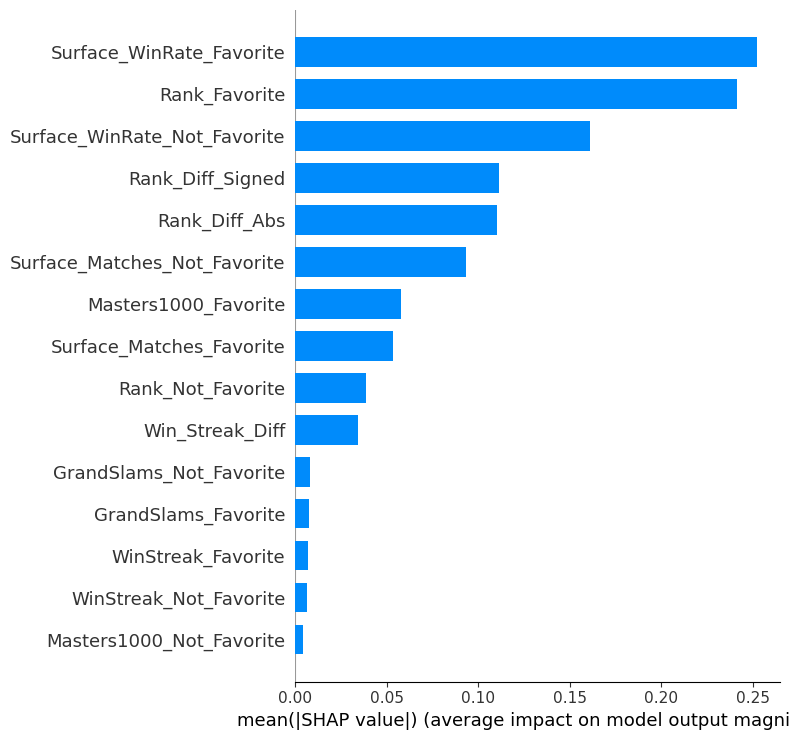

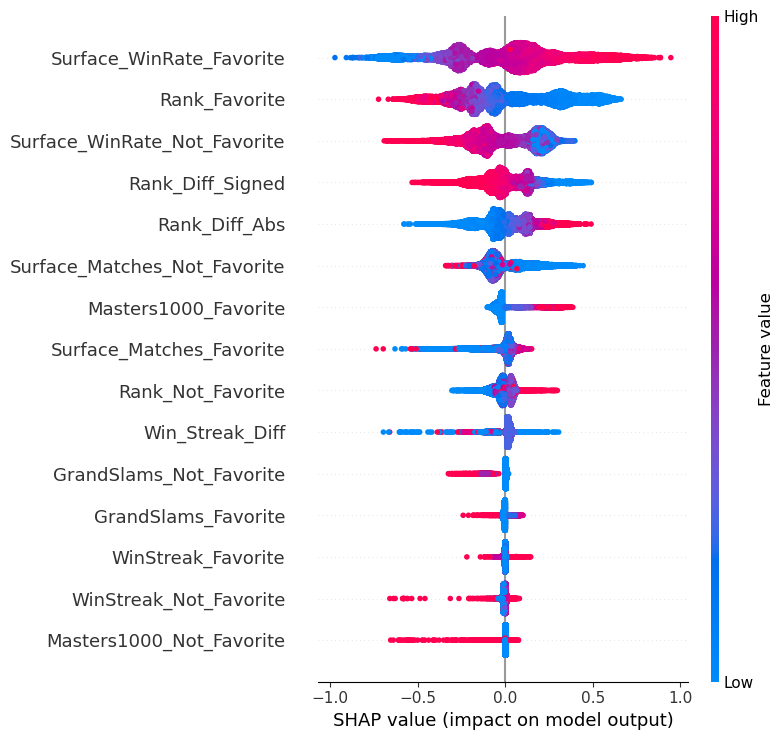

Guardadas: shap_global_importance_bar.png, shap_global_beeswarm.png
Partido HIGH (favorito fuerte): idx=2491, P_fav=0.75
Partido LOW  (no favorito fuerte): idx=21673, P_fav=0.28


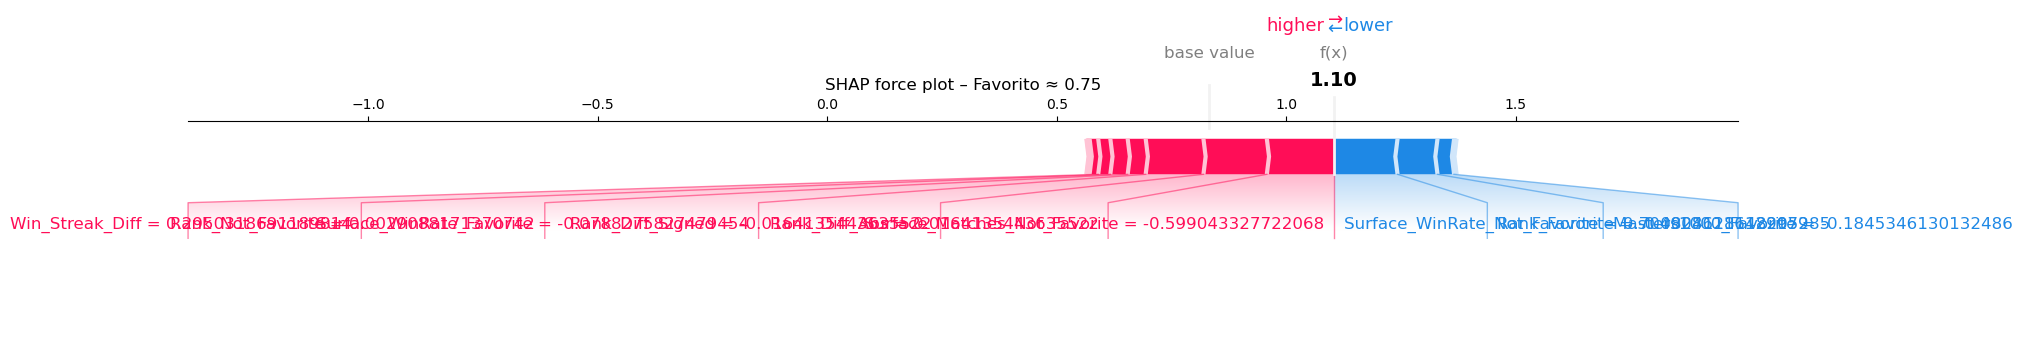

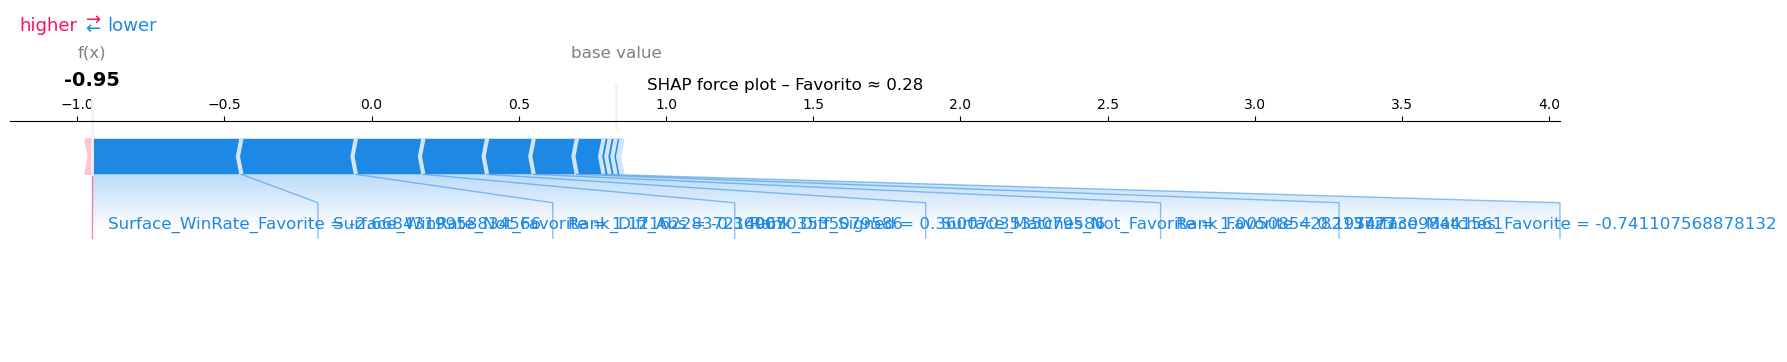

Guardadas: shap_local_force_high.png, shap_local_force_low.png


In [6]:

# Definir y entrenar modelo

# Modelo final optimizado con Optuna
model = GradientBoostingClassifier(
    learning_rate=0.014538386775171604,
    n_estimators=475,
    max_depth=4,
    subsample=0.5162888716243986,
    random_state=42
)

# Entrenar con todo el dataset
model.fit(X, y)

# SHAP: explicaciones

shap.initjs()  # habilita visualizaciones interactivas en notebook

# Crear explicador basado en árboles
explainer = shap.TreeExplainer(model)
raw_shap_values = explainer.shap_values(X)

# Índice de la clase "Gana favorito"
classes = getattr(model, "classes_", np.array([0, 1]))
pos_idx = int(np.where(classes == 1)[0][0]) if 1 in classes else int(np.argmax(classes))

# Normalizar salida para binario/multiclase
if isinstance(raw_shap_values, list):
    sv = raw_shap_values[pos_idx]
    expected = explainer.expected_value[pos_idx]
else:
    sv = raw_shap_values
    expected = explainer.expected_value


# Explicación global

# importancia de variables (ranking)
plt.figure()
shap.summary_plot(sv, X, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig("shap_global_importance_bar.png", dpi=160, bbox_inches="tight")
plt.show()

# b) Dispersión (beeswarm): muestra cómo afectan valores altos/bajos
plt.figure()
shap.summary_plot(sv, X, show=False)
plt.tight_layout()
plt.savefig("shap_global_beeswarm.png", dpi=160, bbox_inches="tight")
plt.show()

print("Guardadas: shap_global_importance_bar.png, shap_global_beeswarm.png")


# Explicaciones locales

# Elegimos partidos extremos como en LIME
probs = model.predict_proba(X)[:, pos_idx]
high_candidates = np.where(probs >= 0.70)[0]
low_candidates  = np.where(probs <= 0.30)[0]

rng = np.random.default_rng(42)
def pick(cands, target):
    return int(rng.choice(cands)) if len(cands) else int(np.argmin(np.abs(probs - target)))

idx_high = pick(high_candidates, 0.85)
idx_low  = pick(low_candidates, 0.15)

print(f"Partido HIGH (favorito fuerte): idx={idx_high}, P_fav={probs[idx_high]:.2f}")
print(f"Partido LOW  (no favorito fuerte): idx={idx_low}, P_fav={probs[idx_low]:.2f}")

# a) Force plot (HIGH)
fig = shap.force_plot(expected, sv[idx_high, :], X.iloc[idx_high, :], matplotlib=True, show=False)
plt.title(f"SHAP force plot – Favorito ≈ {probs[idx_high]:.2f}")
plt.savefig("shap_local_force_high.png", dpi=160, bbox_inches="tight")
plt.show()

# b) Force plot (LOW)
fig = shap.force_plot(expected, sv[idx_low, :], X.iloc[idx_low, :], matplotlib=True, show=False)
plt.title(f"SHAP force plot – Favorito ≈ {probs[idx_low]:.2f}")
plt.savefig("shap_local_force_low.png", dpi=160, bbox_inches="tight")
plt.show()

print("Guardadas: shap_local_force_high.png, shap_local_force_low.png")



### Explicaciones con SHAP

SHAP (SHapley Additive exPlanations) permite descomponer las predicciones del modelo en **contribuciones de cada variable**.  
Los valores SHAP se interpretan así:  
- **Positivos (rojo)** → aumentan la probabilidad de que gane el favorito.  
- **Negativos (azul)** → reducen la probabilidad de que gane el favorito.  



---

#### 1. Importancia global (bar plot)

El gráfico de barras muestra la **importancia media absoluta** de cada variable en todas las predicciones.  
Las más influyentes en el modelo son:

- **Surface_WinRate_Favorite**  
- **Rank_Favorite**  
- **Surface_WinRate_Not_Favorite**  
- **Rank_Diff_Signed** y **Rank_Diff_Abs**

Esto confirma que el modelo se apoya sobre todo en **rendimiento en superficie** y **ranking de los jugadores** para tomar decisiones.

---

#### 2. Comportamiento global (beeswarm)

El gráfico de dispersión (beeswarm) muestra, además de la importancia, **cómo influyen los valores altos o bajos** de cada variable:

- **Surface_WinRate_Favorite** alto (rojo) → aumenta la probabilidad de victoria del favorito.  
- **Surface_WinRate_Not_Favorite** alto (rojo) → reduce la probabilidad de victoria del favorito.  
- **Rank_Favorite** bajo (mejor ranking) → favorece al favorito; alto (peor ranking) → lo perjudica.

Esto refleja patrones consistentes y lógicos: el modelo confía en la calidad del favorito y en el mal desempeño del no favorito en la superficie.

---

#### 3. Explicación local – Caso LOW (P_fav ≈ 0.28)

El modelo predice que el favorito tiene solo un **28% de probabilidad de ganar**.  

Principales factores en contra del favorito:
- **Surface_WinRate_Favorite** (−0.51) → el favorito tiene mal rendimiento en esa superficie.  
- **Surface_WinRate_Not_Favorite** (−0.39) → el no favorito tiene buen winrate en la superficie.  
- **Rank_Diff_Abs** (−0.23) y **Rank_Diff_Signed** (−0.22) → la diferencia de ranking no favorece al favorito.  
- **Surface_Matches_Not_Favorite** (−0.16) → el no favorito ha jugado más en la superficie.  

El no favorito aparece mejor posicionado por experiencia en la superficie y ranking, lo que lleva al modelo a asignarle ventaja.

---

#### 4. Explicación local – Caso HIGH (P_fav ≈ 0.75)

En este partido, el favorito tiene un **75% de probabilidad de ganar**.  

Principales factores a favor del favorito:
- **Surface_Matches_Not_Favorite** (+0.15) → poca experiencia del no favorito en la superficie.  
- **Rank_Diff_Abs** (+0.14) y **Rank_Diff_Signed** (+0.13) → la diferencia de ranking favorece al favorito.  
- Aportes menores: **Surface_WinRate_Favorite** (+0.04), **Rank_Not_Favorite** (+0.04), **Win_Streak_Diff** (+0.03).  

Factores en contra:
- **Surface_WinRate_Not_Favorite** (−0.14).  
- **Rank_Favorite** (−0.09).  
- **Masters1000_Favorite** (−0.04).  

 Aunque existen variables que restan (por ejemplo, cierto rendimiento del no favorito), la ventaja en **ranking** y la **poca experiencia del no favorito en la superficie** hacen que el modelo apueste claramente por el favorito.

---

### Conclusiones generales

- **SHAP global** confirma que el modelo se basa principalmente en **win rates por superficie** y **ranking**.  
- **SHAP local** permite entender por qué en partidos concretos el modelo favorece o no al favorito.  
- En el caso **LOW**, el no favorito domina por rendimiento en superficie y ranking.  
- En el caso **HIGH**, el favorito domina gracias a la diferencia de ranking y la falta de experiencia del rival en la superficie.  

Esto demuestra que el modelo toma decisiones coherentes y basadas en información relevante.
